# Lets's go!!

### Correlación inicial sencilla. Plot.

    holidays_count  avg_total_passengers  avg_domestic  avg_international  \
0                0           3176.462947    579.983236        2682.520081   
1                1           3593.037522   1230.364387        2563.016821   
2                2           4944.640243   2525.356231        2818.276380   
3                3           8297.062880   5180.988894        3799.611649   
4                4           8098.592096   5056.595664        3710.488187   
5                5          10997.042576   6642.305301        5371.282257   
6                6          13074.190754  10367.042991        4808.355687   
7                7          12637.510979   4626.585756        8428.525711   
8                8          10491.288700   2480.662808        9040.824154   
9                9          39249.309788  41000.450200        9284.798720   
10              10          36529.907400  32702.765375       11045.118875   
11              11          59725.808286  51406.637429        8319.170857   

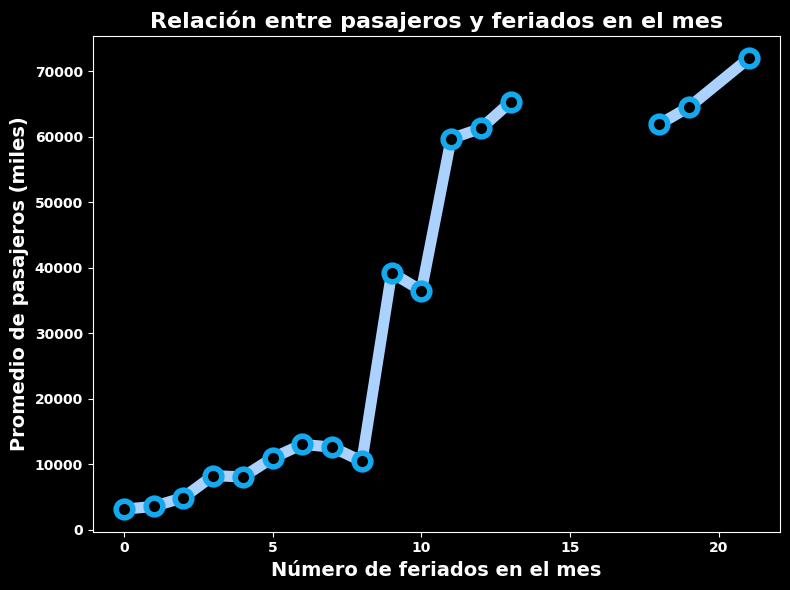

In [46]:
# =============================
# 1. Importar librerías
# =============================
import pandas as pd

# =============================
# 2. Cargar los datasets
# =============================
holidays = pd.read_csv(r'C:\Users\Eydan\Downloads\Hack DataRush\InputData\global_holidays.csv', parse_dates=["Date"])
passengers = pd.read_csv(r'C:\Users\Eydan\Downloads\Hack DataRush\InputData\monthly_passengers.csv')
countries = pd.read_csv(r'C:\Users\Eydan\Downloads\Hack DataRush\InputData\countries.csv')

# =============================
# 3. Preprocesamiento de holidays
# =============================
# Crear columnas de año y mes
holidays["Year"] = holidays["Date"].dt.year
holidays["Month"] = holidays["Date"].dt.month

# Evitar duplicados: si hay feriados repetidos en subregiones, nos quedamos con uno por país-fecha-nombre
holidays = holidays.drop_duplicates(subset=["ISO3", "Date", "Name"])

# Contar feriados por país-año-mes
holidays_monthly = (
    holidays.groupby(["ISO3", "Year", "Month"], as_index=False)
    .agg(
        holidays_count=("Name", "nunique"),             # número de feriados distintos
        public_holidays=("Type", lambda x: (x == "Public holiday").sum())  # solo feriados públicos
    )
)

# =============================
# 4. Preprocesamiento de pasajeros
# =============================
# Asegurar tipos
passengers["Year"] = passengers["Year"].astype(int)
passengers["Month"] = passengers["Month"].astype(int)

# =============================
# 5. Join entre datasets
# =============================
df = passengers.merge(
    holidays_monthly,
    on=["ISO3", "Year", "Month"],
    how="left"
)

# Llenar meses sin feriados con 0
df["holidays_count"] = df["holidays_count"].fillna(0).astype(int)
df["public_holidays"] = df["public_holidays"].fillna(0).astype(int)

# =============================
# 6. Relación pasajeros vs feriados
# =============================
# Ejemplo: promedio de pasajeros por número de feriados en el mes
relation = (
    df.groupby("holidays_count")
    .agg(
        avg_total_passengers=("Total", "mean"),
        avg_domestic=("Domestic", "mean"),
        avg_international=("International", "mean"),
        count=("ISO3", "count")
    )
    .reset_index()
)

print(relation)

# =============================
# 7. Visual con estilo oscuro
# =============================
import matplotlib.pyplot as plt

plt.style.use("dark_background")  # activa tema oscuro

plt.figure(figsize=(8,6))
plt.plot(
    relation["holidays_count"], 
    relation["avg_total_passengers"], 
    marker="o", 
    linewidth=8,           # línea muy gruesa
    color="#ABD2FF",       # azul claro
    markersize=12,         
    markerfacecolor="black",   # puntos rellenos de negro para contraste
    markeredgecolor="#13A9EF", # borde azul brillante
    markeredgewidth=4
)

# Ajustes de ejes y títulos con texto blanco y negrita
plt.xlabel("Número de feriados en el mes", fontsize=14, color="white", fontweight="bold")
plt.ylabel("Promedio de pasajeros (miles)", fontsize=14, color="white", fontweight="bold")
plt.title("Relación entre pasajeros y feriados en el mes", fontsize=16, color="white", fontweight="bold")

# Colorear ticks también
plt.xticks(color="white", fontweight="bold")
plt.yticks(color="white", fontweight="bold")

# Fondo negro explícito
plt.gca().set_facecolor("black")
#plt.grid(True, linestyle="--", alpha=0.4, color="white")  # grid tenue blanco

plt.tight_layout()
plt.show()



Insigts:
Promedio “sin ponderación por país”.
Cada país pesa igual en el promedio, sin importar si mueve 200 mil o 70 millones de pasajeros. Si los meses con muchos feriados están concentrados en países con alto tráfico aéreo, el promedio se dispara. (Esto puede introducir un sesgo tipo Simpson: mezclas países muy distintos).

### Correlaciones mas robustas.

### Aumento de pasajeros (con numeros) con el aumento de holidays

C:\Users\Eydan\AppData\Local\Temp\ipykernel_20908\155741262.py:125: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Eydan\AppData\Local\Temp\ipykernel_20908\155741262.py:125: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



[RAW]   corr=0.411 | slope=1905.55 (pasajeros por día feriado) | n=7237
[DELTA] corr=-0.087 | slope=-1.07 (Δ% por día feriado)     | n=7237


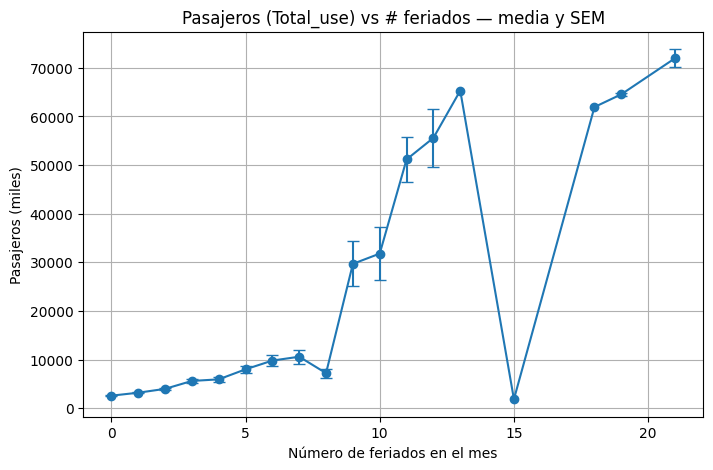

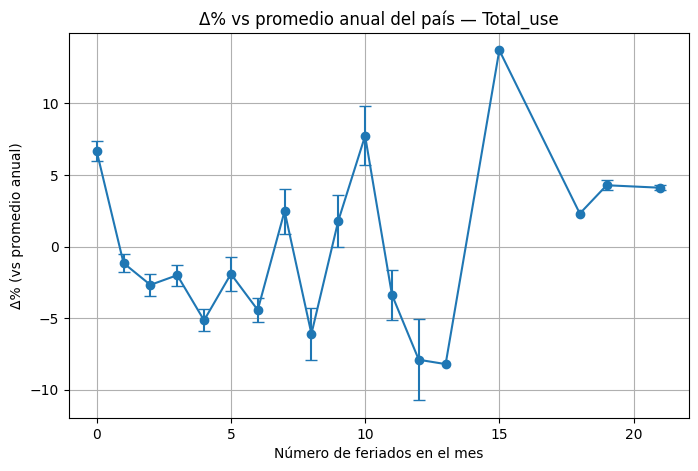

C:\Users\Eydan\AppData\Local\Temp\ipykernel_20908\155741262.py:125: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Eydan\AppData\Local\Temp\ipykernel_20908\155741262.py:125: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



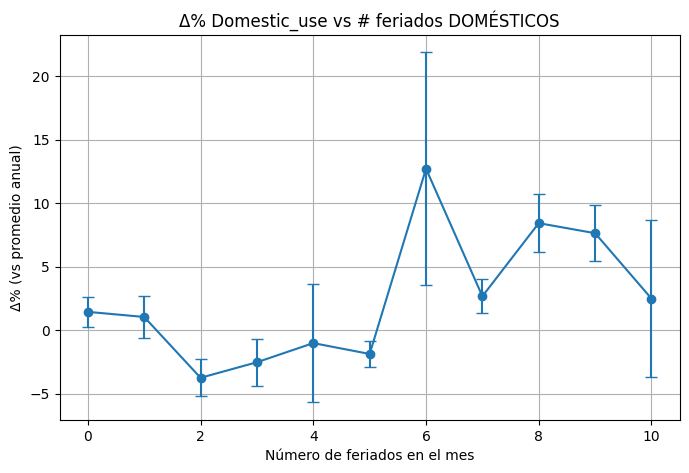

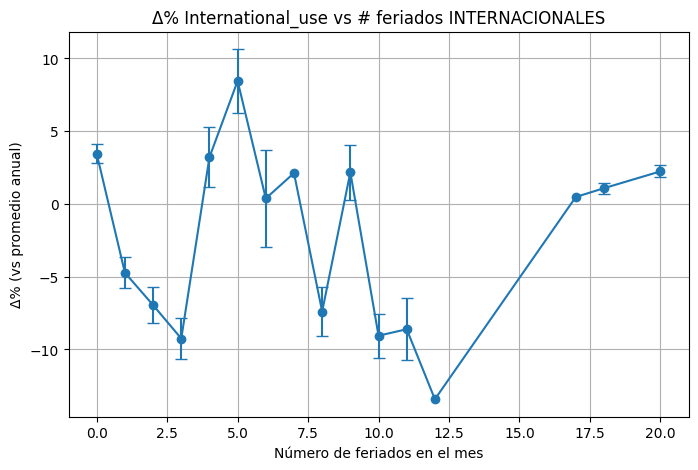


Buckets Total_use (raw):


,holidays_count,mean_simple,mean_weighted,n,sem,iqr
0,0,2573.504637,7890.116557,1794,90.499333,2833.12350
1,1,3181.705760,11779.487757,1951,124.262464,2954.65100
2,2,3971.970749,15064.250137,1279,197.744821,4096.33850
3,3,5602.497469,21607.245790,795,347.402424,6109.35450
4,4,5929.908489,25372.550542,571,463.517164,6006.92950
5,5,7994.193658,27611.032678,374,676.316447,7003.79050
6,6,9792.954891,40958.986538,230,1178.879200,9450.56600
7,7,10584.729932,23613.485754,74,1395.609572,14132.76625
8,8,7204.670376,13482.337079,56,956.733727,13400.85075
9,9,29688.007022,60193.457779,45,4600.349461,58845.00000



Buckets Total_use (Δ%):


,holidays_count,mean_simple,mean_weighted,n,sem,iqr
0,0,6.653142,4.117514,1794,0.688895,31.196633
1,1,-1.152893,1.513162,1951,0.645131,32.680169
2,2,-2.677134,-2.072883,1279,0.765743,26.028327
3,3,-1.998587,-2.719127,795,0.727018,18.873985
4,4,-5.150757,-2.528886,571,0.780441,20.282579
5,5,-1.913400,0.476223,374,1.168637,21.565518
6,6,-4.428688,1.770662,230,0.823869,16.575593
7,7,2.473932,5.794602,74,1.566636,17.408972
8,8,-6.094212,-3.193701,56,1.801562,19.632815
9,9,1.791601,4.193810,45,1.788312,11.352006



Buckets Domestic (Δ% vs anual):


,domestic_holidays,mean_simple,mean_weighted,n,sem,iqr
0,0,1.441387,2.074305,1340,1.156504,25.222788
1,1,1.038902,-0.690457,810,1.647527,25.556457
2,2,-3.751000,-1.585150,571,1.452337,23.314666
3,3,-2.525647,-2.184879,306,1.857136,17.119819
4,4,-1.018572,-4.267581,153,4.654924,19.374848
5,5,-1.873992,-2.600394,55,1.031896,6.289116
6,6,12.712230,2.463534,21,9.171082,10.462417
7,7,2.669709,1.807397,27,1.323713,10.733154
8,8,8.425211,8.968009,4,2.277330,5.936745
9,9,7.633813,7.380418,3,2.224058,3.790171



Buckets International (Δ% vs anual):


,international_holidays,mean_simple,mean_weighted,n,sem,iqr
0,0,3.450550,4.658712,2271,0.663363,38.801246
1,1,-4.723423,-3.032142,862,1.067437,31.447558
2,2,-6.948552,-6.088406,415,1.225055,25.632499
3,3,-9.247788,-8.157874,125,1.391675,22.824608
4,4,3.206261,8.031531,46,2.061459,25.850252
5,5,8.453348,9.646967,40,2.179391,9.026033
6,6,0.378264,14.877700,24,3.333597,31.716793
7,7,2.123613,2.123613,1,NaN,0.000000
8,8,-7.389602,-7.389602,3,1.668174,2.771701
9,9,2.175891,2.175891,22,1.902232,14.490738


In [ ]:
# =========================================
# 1) Importar librerías y cargar datos
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# RUTAS (ajusta a tu entorno)
PATH_H = r'C:\Users\Eydan\Downloads\Hack DataRush\InputData\global_holidays.csv'
PATH_P = r'C:\Users\Eydan\Downloads\Hack DataRush\InputData\monthly_passengers.csv'
PATH_C = r'C:\Users\Eydan\Downloads\Hack DataRush\InputData\countries.csv'  # opcional

holidays   = pd.read_csv(PATH_H, parse_dates=["Date"])
passengers = pd.read_csv(PATH_P)
countries  = pd.read_csv(PATH_C)

# =========================================
# 2) Preprocesar feriados (Year/Month, dedup, scope)
# =========================================
holidays["Year"]  = holidays["Date"].dt.year
holidays["Month"] = holidays["Date"].dt.month

# deduplicar por subregión (mismo país-fecha-nombre)
holidays = holidays.drop_duplicates(subset=["ISO3","Date","Name"]).copy()

# Clasificación basada en Type -> alcance
scope_map = {
    "Public holiday": "domestic",
    "Local holiday": "domestic",
    "Special holiday": "domestic",
    "Observance": "international",
    "Local observance": "international",
    "Half-day holiday": "other",
    "Working day (replacement)": "other",
}
holidays["holiday_scope"] = holidays["Type"].map(scope_map).fillna("other")

# Agregado mensual por país
holidays_monthly = (
    holidays.groupby(["ISO3","Year","Month"], as_index=False)
            .agg(
                holidays_count=("Name","nunique"),
                public_holidays=("Type", lambda x: (x=="Public holiday").sum()),
                domestic_holidays=("holiday_scope", lambda x: (x=="domestic").sum()),
                international_holidays=("holiday_scope", lambda x: (x=="international").sum()),
            )
)

# =========================================
# 3) Preprocesar pasajeros y hacer merge
# =========================================
passengers["Year"]  = pd.to_numeric(passengers["Year"], errors="coerce").astype(int)
passengers["Month"] = pd.to_numeric(passengers["Month"], errors="coerce").astype(int)

df = passengers.merge(holidays_monthly, on=["ISO3","Year","Month"], how="left")
for col in ["holidays_count","public_holidays","domestic_holidays","international_holidays"]:
    df[col] = df[col].fillna(0).astype(int)

# =========================================
# 4) Coalesce de métricas – Total_use / Domestic_use / International_use
# =========================================
def build_use_cols(d):
    d = d.copy()
    # Total_use
    d["Total_use"] = pd.to_numeric(d.get("Total"), errors="coerce")
    if "Total_OS" in d.columns:
        m = d["Total_use"].isna() & d["Total_OS"].notna()
        d.loc[m, "Total_use"] = pd.to_numeric(d.loc[m, "Total_OS"], errors="coerce")
    # si aún NaN y tenemos Domestic+International:
    m = d["Total_use"].isna() & d["Domestic"].notna() & d["International"].notna()
    d.loc[m, "Total_use"] = pd.to_numeric(d.loc[m, "Domestic"], errors="coerce") + pd.to_numeric(d.loc[m, "International"], errors="coerce")

    # Versiones "use" para Dom/Int (por si faltaran)
    d["Domestic_use"]      = pd.to_numeric(d.get("Domestic"), errors="coerce")
    d["International_use"] = pd.to_numeric(d.get("International"), errors="coerce")
    return d

df = build_use_cols(df)

# =========================================
# 5) Normalización dentro de país–año (Δ% vs promedio anual del país)
#    Esto elimina sesgos de tamaño y estacionalidad anual
# =========================================
def add_country_year_normalized(d, value_col="Total_use"):
    d = d.copy()
    # promedio anual por país–año (usa solo meses con dato)
    base = d.groupby(["ISO3","Year"], as_index=False)[value_col].mean().rename(columns={value_col:"_year_mean"})
    d = d.merge(base, on=["ISO3","Year"], how="left")
    # Δ% vs promedio anual: (x - mean) / mean * 100
    d[value_col + "_delta_pct"] = (d[value_col] - d["_year_mean"]) / d["_year_mean"] * 100
    return d.drop(columns=["_year_mean"])

df = add_country_year_normalized(df, "Total_use")
df = add_country_year_normalized(df, "Domestic_use")
df = add_country_year_normalized(df, "International_use")

# =========================================
# 6) Estadísticas por bucket de feriados (holidays_count)
#    - media simple y ponderada (peso = promedio país en todo el periodo)
#    - SEM (error estándar) e IQR
# =========================================
# Pesos por país (promedio Total_use del país en todo el periodo)
country_weights = df.groupby("ISO3", as_index=False)["Total_use"].mean().rename(columns={"Total_use":"country_avg"})
df = df.merge(country_weights, on="ISO3", how="left")

def bucket_stats(d, value_col, x_col="holidays_count"):
    sub = d[[x_col, value_col, "ISO3", "country_avg"]].dropna()
    # simple
    g = sub.groupby(x_col)[value_col]
    mean_simple = g.mean()
    n = g.size()
    std = g.std()
    sem = std / np.sqrt(n)  # error estándar
    # IQR
    q75 = g.quantile(0.75)
    q25 = g.quantile(0.25)
    iqr = q75 - q25

    # ponderado por tamaño país (promedio país como peso)
    def wmean(x, w):
        x, w = np.array(x), np.array(w)
        m = ~np.isnan(x) & ~np.isnan(w) & (w>0)
        return np.sum(x[m]*w[m]) / np.sum(w[m]) if m.any() else np.nan

    wmeans = sub.groupby(x_col).apply(lambda z: wmean(z[value_col], z["country_avg"]))

    out = pd.DataFrame({
        x_col: mean_simple.index,
        "mean_simple": mean_simple.values,
        "mean_weighted": wmeans.values,
        "n": n.values,
        "sem": sem.values,
        "iqr": iqr.values
    }).sort_values(x_col).reset_index(drop=True)
    return out

# Buckets para Total_use (raw) y Δ% (normalizado)
buckets_total_raw   = bucket_stats(df, "Total_use", "holidays_count")
buckets_total_delta = bucket_stats(df, "Total_use_delta_pct", "holidays_count")

# =========================================
# 7) Métricas globales (correlación y pendiente)
# =========================================
def quick_metrics(d, x_col, y_col):
    z = d[[x_col, y_col]].dropna()
    corr_p = z[x_col].corr(z[y_col], method="pearson")
    # pendiente (ajuste lineal)
    m, b = np.polyfit(z[x_col], z[y_col], 1)
    return corr_p, m, b, len(z)

corr_raw, m_raw, b_raw, n_raw = quick_metrics(df, "holidays_count", "Total_use")
corr_delta, m_delta, b_delta, n_delta = quick_metrics(df, "holidays_count", "Total_use_delta_pct")

print(f"[RAW]   corr={corr_raw:.3f} | slope={m_raw:.2f} (pasajeros por día feriado) | n={n_raw}")
print(f"[DELTA] corr={corr_delta:.3f} | slope={m_delta:.2f} (Δ% por día feriado)     | n={n_delta}")

# =========================================
# 8) Gráficos con barras de error (SEM)
# =========================================
def plot_bucket_with_error(tbl, x_col, y_col_mean="mean_simple", err_col="sem", title="", ylabel=""):
    plt.figure(figsize=(8,5))
    x = tbl[x_col].values
    y = tbl[y_col_mean].values
    yerr = tbl[err_col].values
    plt.errorbar(x, y, yerr=yerr, fmt="o-", capsize=4)
    plt.xlabel("Número de feriados en el mes")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# (A) Total_use (raw)
plot_bucket_with_error(
    buckets_total_raw, "holidays_count", "mean_simple", "sem",
    title="Pasajeros (Total_use) vs # feriados — media y SEM",
    ylabel="Pasajeros (miles)"
)

# (B) Total_use_delta_pct (normalizado dentro de país–año)
plot_bucket_with_error(
    buckets_total_delta, "holidays_count", "mean_simple", "sem",
    title="Δ% vs promedio anual del país — Total_use",
    ylabel="Δ% (vs promedio anual)"
)

# =========================================
# 9) (Opcional) separar por tipo de feriado y canal
#     - Public holidays ↔ Domestic_use
#     - Observances ↔ International_use
# =========================================
# Repite el cálculo de buckets pero con domestic_holidays / international_holidays
buckets_dom = bucket_stats(df, "Domestic_use_delta_pct", "domestic_holidays")
buckets_int = bucket_stats(df, "International_use_delta_pct", "international_holidays")

plot_bucket_with_error(
    buckets_dom, "domestic_holidays", "mean_simple", "sem",
    title="Δ% Domestic_use vs # feriados DOMÉSTICOS",
    ylabel="Δ% (vs promedio anual)"
)
plot_bucket_with_error(
    buckets_int, "international_holidays", "mean_simple", "sem",
    title="Δ% International_use vs # feriados INTERNACIONALES",
    ylabel="Δ% (vs promedio anual)"
)

# Mostrar tablas resumen
print("\nBuckets Total_use (raw):")
display(buckets_total_raw.head(12))
print("\nBuckets Total_use (Δ%):")
display(buckets_total_delta.head(12))
print("\nBuckets Domestic (Δ% vs anual):")
display(buckets_dom.head(12))
print("\nBuckets International (Δ% vs anual):")
display(buckets_int.head(12))

Mejor formato

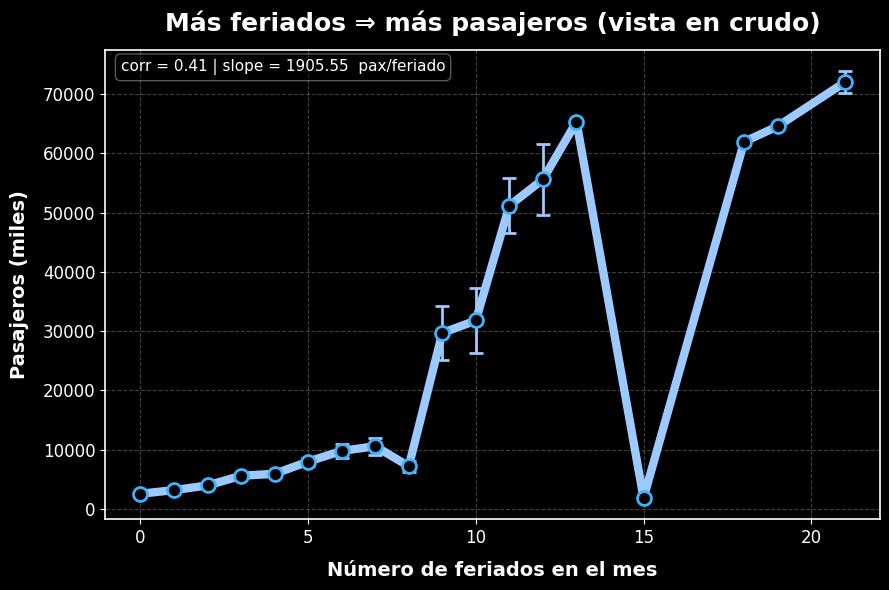

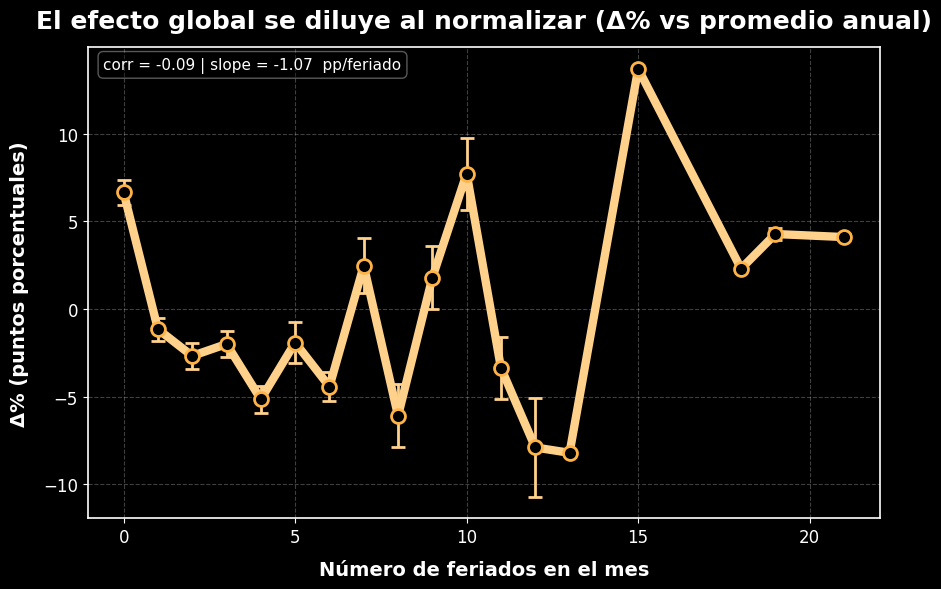

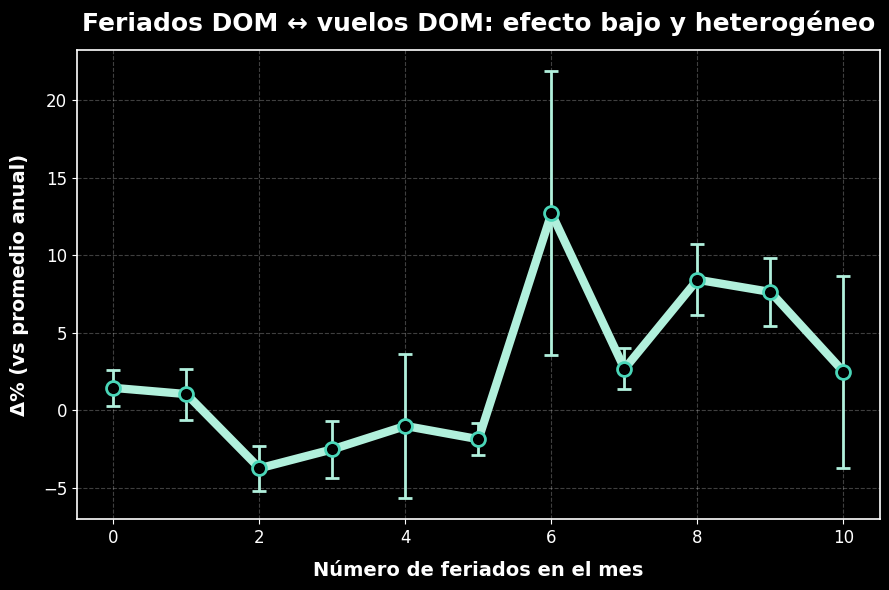

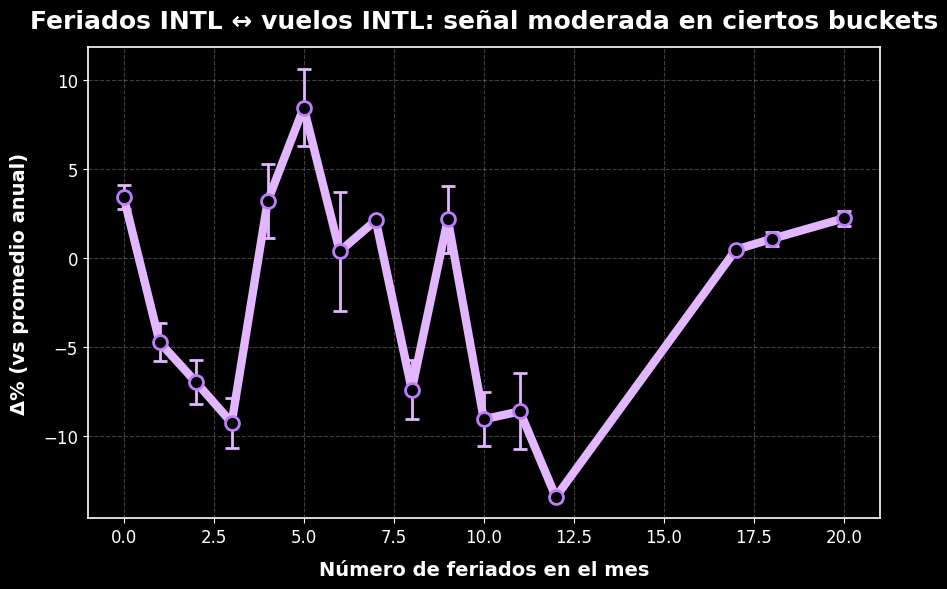

In [47]:
# =========================================
# 8) y 9) GRÁFICAS LISTAS PARA STORYTELLING
#    - Tema oscuro, tipografías grandes, negritas
#    - Líneas gruesas y colores consistentes
#    - Error bars (SEM) y caja con corr/slope (opcional)
# =========================================
import matplotlib.pyplot as plt

# ---- Estilo global oscuro
plt.style.use("dark_background")

def _apply_axes_style(ax, title, ylabel, xlabel="Número de feriados en el mes"):
    ax.set_facecolor("black")
    ax.set_title(title, fontsize=18, color="white", fontweight="bold", pad=14)
    ax.set_xlabel(xlabel, fontsize=14, color="white", fontweight="bold", labelpad=10)
    ax.set_ylabel(ylabel, fontsize=14, color="white", fontweight="bold", labelpad=10)
    ax.tick_params(colors="white", labelsize=12)
    for spine in ax.spines.values():
        spine.set_color("white")
        spine.set_linewidth(1.2)
    ax.grid(True, linestyle="--", alpha=0.25, color="white")

def _annot_metrics(ax, corr=None, slope=None, unit=""):
    txt = []
    if corr is not None and not np.isnan(corr):
        txt.append(f"corr = {corr:.2f}")
    if slope is not None and not np.isnan(slope):
        suf = f" {unit}" if unit else ""
        txt.append(f"slope = {slope:.2f}{suf}")
    if txt:
        ax.text(
            0.02, 0.98, " | ".join(txt),
            transform=ax.transAxes, ha="left", va="top",
            fontsize=11, color="white",
            bbox=dict(facecolor="black", edgecolor="white", alpha=0.35, boxstyle="round,pad=0.35")
        )

def plot_bucket_story(tbl, x_col, y_col_mean, err_col, title, ylabel,
                      color_line="#ABD2FF", color_marker_edge="#13A9EF",
                      outname=None, corr=None, slope=None, slope_unit=""):
    fig, ax = plt.subplots(figsize=(9,6))
    x = tbl[x_col].values
    y = tbl[y_col_mean].values
    yerr = tbl[err_col].values

    # línea gruesa + marcadores contrastados
    ax.errorbar(
        x, y, yerr=yerr,
        fmt="o-", capsize=5, elinewidth=2,
        linewidth=6, markersize=10,
        color=color_line, markerfacecolor="black", markeredgecolor=color_marker_edge, markeredgewidth=2
    )

    _apply_axes_style(ax, title, ylabel)
    _annot_metrics(ax, corr=corr, slope=slope, unit=slope_unit)

    plt.tight_layout()
    if outname:
        plt.savefig(outname, dpi=160, facecolor="black")
    plt.show()

# -------------------------------
# (A) Total_use (raw)
# -------------------------------
plot_bucket_story(
    tbl=buckets_total_raw,
    x_col="holidays_count", y_col_mean="mean_simple", err_col="sem",
    title="Más feriados ⇒ más pasajeros (vista en crudo)",
    ylabel="Pasajeros (miles)",
    color_line="#9CC9FF", color_marker_edge="#3DB2FF",
    outname="plot_total_use_raw_story.png",
    corr=corr_raw, slope=m_raw, slope_unit=" pax/feriado"
)

# -------------------------------
# (B) Total_use_delta_pct (normalizado país–año)
# -------------------------------
plot_bucket_story(
    tbl=buckets_total_delta,
    x_col="holidays_count", y_col_mean="mean_simple", err_col="sem",
    title="El efecto global se diluye al normalizar (Δ% vs promedio anual)",
    ylabel="Δ% (puntos porcentuales)",
    color_line="#FFD18B", color_marker_edge="#FFB347",
    outname="plot_total_use_delta_story.png",
    corr=corr_delta, slope=m_delta, slope_unit=" pp/feriado"
)

# -------------------------------
# (C) DOMÉSTICO ↔ feriados DOMÉSTICOS (Δ%)
# -------------------------------
plot_bucket_story(
    tbl=buckets_dom,
    x_col="domestic_holidays", y_col_mean="mean_simple", err_col="sem",
    title="Feriados DOM ↔ vuelos DOM: efecto bajo y heterogéneo",
    ylabel="Δ% (vs promedio anual)",
    color_line="#B1F0DC", color_marker_edge="#4AD6B8",
    outname="plot_dom_aligned_story.png"
)

# -------------------------------
# (D) INTERNACIONAL ↔ feriados INTERNACIONALES (Δ%)
# -------------------------------
plot_bucket_story(
    tbl=buckets_int,
    x_col="international_holidays", y_col_mean="mean_simple", err_col="sem",
    title="Feriados INTL ↔ vuelos INTL: señal moderada en ciertos buckets",
    ylabel="Δ% (vs promedio anual)",
    color_line="#E3B7FF", color_marker_edge="#C07CFF",
    outname="plot_intl_aligned_story.png"
)


### Correlación inicial sencilla. Indicadores.

In [ ]:
import numpy as np
import pandas as pd

# 1) Limpiar valores no finitos antes de cualquier métrica
def finite(df, cols):
    z = df[cols].copy()
    for c in cols:
        z = z[np.isfinite(z[c])]
    return z

# 2) Pearson + recta, sin explotar si hay pocos puntos o varianza cero
def pearson_with_line_safe(df, x, y):
    sub = df[[x, y]].dropna()
    sub = sub[np.isfinite(sub[x]) & np.isfinite(sub[y])]
    if len(sub) < 3 or sub[x].nunique() < 2:
        return {"r": np.nan, "p": np.nan, "slope": np.nan, "n": len(sub)}
    # correlación
    from scipy.stats import pearsonr
    r, p = pearsonr(sub[x], sub[y])
    # pendiente
    m, b = np.polyfit(sub[x].values, sub[y].values, 1)
    return {"r": r, "p": p, "slope": m, "n": len(sub)}

# 3) Buckets con manejo de n<2 y SEM seguro
def bucket_stats_safe(df, x_col, y_col):
    sub = df[[x_col, y_col]].dropna()
    sub = sub[np.isfinite(sub[x_col]) & np.isfinite(sub[y_col])]
    g = sub.groupby(x_col)[y_col]
    mean = g.mean()
    n    = g.size()
    # std/sem: definir NaN si n<2 para evitar warnings
    std  = g.std()
    sem  = std / np.sqrt(n.replace(0, np.nan))
    out = pd.DataFrame({x_col: mean.index, "mean": mean.values, "n": n.values, "sem": sem.values})
    # opcional: filtra buckets súper chicos
    out.loc[out["n"] < 3, "sem"] = np.nan
    return out.sort_values(x_col).reset_index(drop=True)


In [ ]:
# RAW
g1 = pearson_with_line_safe(df, "holidays_count", "Total_use")
print(f"[RAW]   r={g1['r']:.3f}  slope={g1['slope']:.2f}  n={g1['n']}  p={g1['p']}")

# DELTA
g2 = pearson_with_line_safe(df, "holidays_count", "Total_use_delta_pct")
print(f"[DELTA] r={g2['r']:.3f}  slope={g2['slope']:.2f}  n={g2['n']}  p={g2['p']}")

# Buckets para tus gráficos
b_raw   = bucket_stats_safe(df, "holidays_count", "Total_use")
b_delta = bucket_stats_safe(df, "holidays_count", "Total_use_delta_pct")


[RAW]   r=0.411  slope=1905.55  n=7237  p=3.351558749188233e-293
[DELTA] r=-0.087  slope=-1.07  n=7237  p=1.5959461693917443e-13


In [ ]:
import matplotlib.pyplot as plt

def plot_buckets(tbl, x, y, err, title, ylabel, fname):
    t = tbl.dropna(subset=[x, y])  # si sem es NaN, matplotlib los ignora si lo pasas tal cual
    plt.figure(figsize=(8,5))
    plt.errorbar(t[x], t[y], yerr=t[err], fmt="o-", capsize=4)
    plt.xlabel("Número de feriados en el mes")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(fname, dpi=140)
    plt.show()



[RAW]   r=0.411  slope=1905.55 pasajeros/feriado  n=7237  p=3.351558749188233e-293
[DELTA] r=-0.087  slope=-1.07 pp/feriado         n=7237  p=1.5959461693917443e-13


,ISO3,r,slope_pp_per_holiday,n,p,country
0,NZL,0.528353,1.533968,48,0.000113,New Zealand
1,CAN,0.443973,1.643084,108,0.000001,Canada
2,JAM,0.420674,4.797854,24,0.040663,Jamaica
3,CYM,0.408514,5.146759,24,0.047490,Cayman Islands
4,EGY,0.401585,1.997487,37,0.013755,Egypt
5,GTM,0.358174,3.244777,41,0.021483,Guatemala
6,PHL,0.350733,1.782447,48,0.014522,Philippines
7,TUR,0.338118,4.456289,96,0.000754,Türkiye
8,THA,0.331767,1.371142,108,0.000452,Thailand
9,LCA,0.299051,4.321758,33,0.090911,Saint Lucia


,ISO3,r,slope_pp_per_holiday,n,p,country
78,ISL,-0.394958,-8.477621,108,2.336252e-05,Iceland
79,LTU,-0.396345,-6.279222,108,2.173625e-05,Lithuania
80,GIB,-0.397659,-7.265573,96,6.021596e-05,Gibraltar
81,BLR,-0.404689,-9.953076,25,4.478882e-02,Belarus
82,GRC,-0.411558,-37.885794,108,9.644069e-06,Greece
83,KOS,-0.415441,-7.264709,88,5.698645e-05,NaN
84,SRB,-0.428420,-6.738027,96,1.333411e-05,Serbia
85,GEO,-0.513515,-10.192678,96,8.779497e-08,Georgia
86,BIH,-0.530754,-12.611750,96,2.659667e-08,Bosnia and Herzegovina
87,GBR,-0.578425,-7.159099,108,5.528355e-11,United Kingdom



TOP5 países (más respuesta a feriados):
 • New Zealand: cada feriado extra se asocia con +1.5 pp en Δ% del tráfico mensual (significativo, p<0.05) (n=48).
 • Canada: cada feriado extra se asocia con +1.6 pp en Δ% del tráfico mensual (significativo, p<0.05) (n=108).
 • Jamaica: cada feriado extra se asocia con +4.8 pp en Δ% del tráfico mensual (significativo, p<0.05) (n=24).
 • Cayman Islands: cada feriado extra se asocia con +5.1 pp en Δ% del tráfico mensual (significativo, p<0.05) (n=24).
 • Egypt: cada feriado extra se asocia con +2.0 pp en Δ% del tráfico mensual (significativo, p<0.05) (n=37).

BOTTOM5 países (menos/negativa):
 • nan: cada feriado extra se asocia con -7.3 pp en Δ% del tráfico mensual (significativo, p<0.05) (n=88).
 • Serbia: cada feriado extra se asocia con -6.7 pp en Δ% del tráfico mensual (significativo, p<0.05) (n=96).
 • Georgia: cada feriado extra se asocia con -10.2 pp en Δ% del tráfico mensual (significativo, p<0.05) (n=96).
 • Bosnia and Herzegovina: cada 

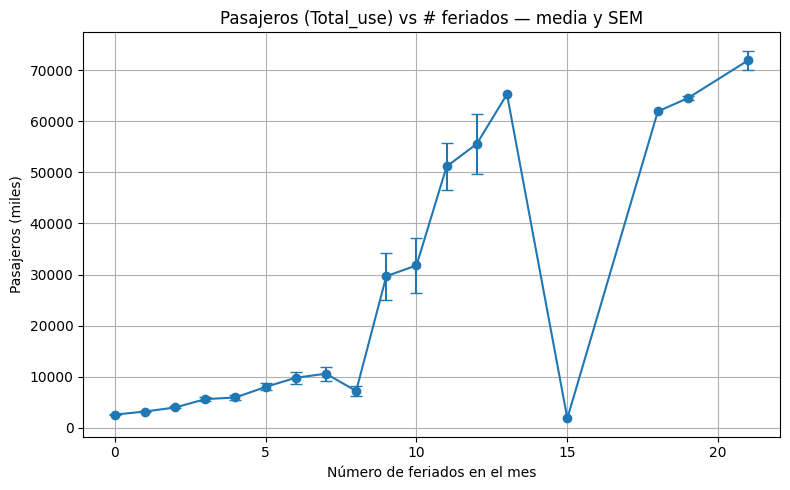

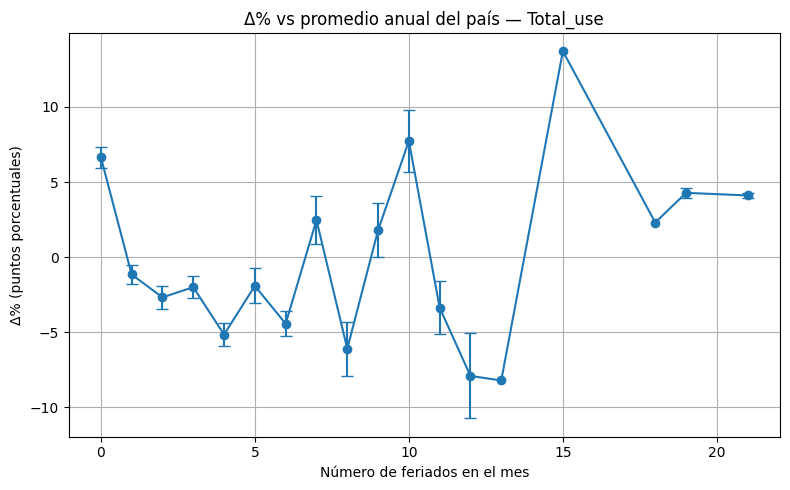

In [29]:
# =========================================================
# A. Coalesce de pasajeros (Total_use) y normalización
# =========================================================
import numpy as np

def build_use_cols(d):
    d = d.copy()
    d["Total_use"] = pd.to_numeric(d.get("Total"), errors="coerce")
    if "Total_OS" in d.columns:
        m = d["Total_use"].isna() & d["Total_OS"].notna()
        d.loc[m, "Total_use"] = pd.to_numeric(d.loc[m, "Total_OS"], errors="coerce")
    m = d["Total_use"].isna() & d["Domestic"].notna() & d["International"].notna()
    d.loc[m, "Total_use"] = pd.to_numeric(d.loc[m, "Domestic"], errors="coerce") + pd.to_numeric(d.loc[m, "International"], errors="coerce")
    d["Domestic_use"]      = pd.to_numeric(d.get("Domestic"), errors="coerce")
    d["International_use"] = pd.to_numeric(d.get("International"), errors="coerce")
    return d

df = build_use_cols(df)

# Δ% vs promedio anual del país (para cada métrica)
def add_delta_pct(d, col):
    base = d.groupby(["ISO3","Year"], as_index=False)[col].mean().rename(columns={col:"_year_mean"})
    z = d.merge(base, on=["ISO3","Year"], how="left")
    z[col+"_delta_pct"] = (z[col] - z["_year_mean"]) / z["_year_mean"] * 100
    return z.drop(columns=["_year_mean"])

for col in ["Total_use", "Domestic_use", "International_use"]:
    df = add_delta_pct(df, col)

# =========================================================
# B. Correlación global y pendiente (con p-value) — SAFE
# =========================================================
from scipy.stats import pearsonr

def pearson_with_line_safe(d, x, y):
    sub = d[[x, y]].dropna()
    sub = sub[np.isfinite(sub[x]) & np.isfinite(sub[y])]
    if len(sub) < 3 or sub[x].nunique() < 2:
        return {"r": np.nan, "p": np.nan, "slope": np.nan, "n": len(sub)}
    r, p = pearsonr(sub[x], sub[y])
    m, b = np.polyfit(sub[x].values, sub[y].values, 1)
    return {"r": r, "p": p, "slope": m, "n": len(sub)}

g1 = pearson_with_line_safe(df, "holidays_count", "Total_use")
g2 = pearson_with_line_safe(df, "holidays_count", "Total_use_delta_pct")

print(f"[RAW]   r={g1['r']:.3f}  slope={g1['slope']:.2f} pasajeros/feriado  n={g1['n']}  p={g1['p']}")
print(f"[DELTA] r={g2['r']:.3f}  slope={g2['slope']:.2f} pp/feriado         n={g2['n']}  p={g2['p']}")

# =========================================================
# C. Ranking por país (correlación Total_use_delta_pct ~ holidays_count) — SAFE
# =========================================================
rows = []
for iso, g in df.groupby("ISO3"):
    tmp = g[["holidays_count","Total_use_delta_pct"]].dropna()
    tmp = tmp[np.isfinite(tmp["holidays_count"]) & np.isfinite(tmp["Total_use_delta_pct"])]
    if len(tmp) >= 8 and tmp["holidays_count"].nunique() >= 3:
        r, p = pearsonr(tmp["holidays_count"], tmp["Total_use_delta_pct"])
        m, _ = np.polyfit(tmp["holidays_count"].values, tmp["Total_use_delta_pct"].values, 1)
        rows.append({"ISO3": iso, "r": r, "slope_pp_per_holiday": m, "n": len(tmp), "p": p})

per_country = pd.DataFrame(rows).sort_values("r", ascending=False)

# (opcional) añade nombre de país si tienes 'countries'
if "countries" in globals():
    per_country = per_country.merge(countries[["alpha_3","name"]], left_on="ISO3", right_on="alpha_3", how="left").drop(columns=["alpha_3"])
    per_country = per_country.rename(columns={"name":"country"})

display(per_country.head(10))
display(per_country.tail(10))
per_country.to_csv("per_country_correlations_delta.csv", index=False)

# =========================================================
# D. Frases listas para el pitch — SAFE
# =========================================================
def sentence(row):
    sig = "" if (pd.isna(row["p"]) or row["p"]>=0.05) else " (significativo, p<0.05)"
    who = row.get("country", row["ISO3"])
    return f"{who}: cada feriado extra se asocia con {row['slope_pp_per_holiday']:+.1f} pp en Δ% del tráfico mensual{sig} (n={int(row['n'])})."

top5 = per_country.head(5).apply(sentence, axis=1).tolist()
bot5 = per_country.tail(5).apply(sentence, axis=1).tolist()

print("\nTOP5 países (más respuesta a feriados):")
for s in top5: print(" •", s)
print("\nBOTTOM5 países (menos/negativa):")
for s in bot5: print(" •", s)

# =========================================================
# E. Tablas por bucket (media + SEM) — SAFE
# =========================================================
def bucket_stats_safe(d, value_col, x_col="holidays_count", min_n_for_sem=3):
    sub = d[[x_col, value_col]].dropna()
    sub = sub[np.isfinite(sub[x_col]) & np.isfinite(sub[value_col])]
    g = sub.groupby(x_col)[value_col]
    mean = g.mean()
    n    = g.size()
    std  = g.std()
    sem  = std / np.sqrt(n.replace(0, np.nan))
    out = pd.DataFrame({x_col: mean.index, "mean": mean.values, "n": n.values, "sem": sem.values})
    # si hay pocos casos en el bucket, no dibujes SEM
    out.loc[out["n"] < min_n_for_sem, "sem"] = np.nan
    return out.sort_values(x_col).reset_index(drop=True)

buckets_raw   = bucket_stats_safe(df, "Total_use", "holidays_count")
buckets_delta = bucket_stats_safe(df, "Total_use_delta_pct", "holidays_count")
buckets_raw.to_csv("buckets_total_use_raw.csv", index=False)
buckets_delta.to_csv("buckets_total_use_delta.csv", index=False)

# =========================================================
# F. Gráficos (error bars) — SAFE
# =========================================================
def plot_bucket(tbl, x, y, err, title, ylabel, fname):
    t = tbl.dropna(subset=[x, y])  # matplotlib ignora yerr NaN
    plt.figure(figsize=(8,5))
    plt.errorbar(t[x], t[y], yerr=t[err], fmt="o-", capsize=4)
    plt.xlabel("Número de feriados en el mes")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(fname, dpi=140)
    plt.show()

plot_bucket(buckets_raw,   "holidays_count", "mean", "sem",
            "Pasajeros (Total_use) vs # feriados — media y SEM",
            "Pasajeros (miles)", "plot_total_use_raw.png")

plot_bucket(buckets_delta, "holidays_count", "mean", "sem",
            "Δ% vs promedio anual del país — Total_use",
            "Δ% (puntos porcentuales)", "plot_total_use_delta.png")



### Distiction por internacional y local. Para no contaminar la muestra.

In [33]:
# Clasificar cada feriado según su tipo
def classify_scope(x):
    if x in ["Public holiday", "Local holiday", "Special holiday"]:
        return "domestic"
    elif x in ["Observance", "Local observance"]:
        return "international"
    else:
        return "other"

holidays["holiday_scope"] = holidays["Type"].apply(classify_scope)

# Agregar por país–año–mes
holidays_monthly = (
    holidays.groupby(["ISO3","Year","Month"], as_index=False)
            .agg(
                domestic_holidays=("holiday_scope", lambda x: (x=="domestic").sum()),
                international_holidays=("holiday_scope", lambda x: (x=="international").sum()),
                other_holidays=("holiday_scope", lambda x: (x=="other").sum())
            )
)

# Merge con pasajeros
df = passengers.merge(holidays_monthly, on=["ISO3","Year","Month"], how="left").fillna(0)

# Correlaciones más específicas
corr_domestic = df[["domestic_holidays","Domestic"]].corr().iloc[0,1]
corr_international = df[["international_holidays","International"]].corr().iloc[0,1]

print(f"Correlación feriados domésticos vs vuelos domésticos: {corr_domestic:.3f}")
print(f"Correlación feriados internacionales vs vuelos internacionales: {corr_international:.3f}")

Correlación feriados domésticos vs vuelos domésticos: 0.025
Correlación feriados internacionales vs vuelos internacionales: 0.222


### Efecto real de las festividades, análisis del delta.

In [ ]:
# =========================================
# 0) Imports
# =========================================
import pandas as pd
import numpy as np
from pathlib import Path

# =========================================
# 1) Carga de datos (ajusta rutas si hace falta)
# =========================================
DATA_DIR = Path(".")
#holidays   = pd.read_csv(DATA_DIR / "global_holidays.csv", parse_dates=["Date"])
#passengers = pd.read_csv(DATA_DIR / "monthly_passengers.csv")
#countries  = pd.read_csv(DATA_DIR / "countries.csv")  # opcional

# =========================================
# 2) Preproceso de feriados
#    - Derivar Year/Month
#    - Quitar duplicados por subregión (mismo país-fecha-nombre)
#    - Mapear Type -> scope (domestic/international/other) basado en el dataset
# =========================================
holidays["Year"]  = holidays["Date"].dt.year
holidays["Month"] = holidays["Date"].dt.month

holidays = holidays.drop_duplicates(subset=["ISO3", "Date", "Name"]).copy()

scope_map = {
    "Public holiday": "domestic",
    "Local holiday": "domestic",
    "Special holiday": "domestic",
    "Observance": "international",
    "Local observance": "international",
    "Half-day holiday": "other",
    "Working day (replacement)": "other",
}
holidays["holiday_scope"] = holidays["Type"].map(scope_map).fillna("other")

# Agregación mensual por país (contadores)
holidays_monthly = (
    holidays.groupby(["ISO3","Year","Month"], as_index=False)
            .agg(
                holidays_count=("Name", "nunique"),
                domestic_holidays=("holiday_scope", lambda x: (x=="domestic").sum()),
                international_holidays=("holiday_scope", lambda x: (x=="international").sum()),
                other_holidays=("holiday_scope", lambda x: (x=="other").sum()),
            )
)

# =========================================
# 3) Preproceso de pasajeros (asegurar tipos)
# =========================================
passengers["Year"]  = passengers["Year"].astype(int)
passengers["Month"] = passengers["Month"].astype(int)

# =========================================
# 4) Merge maestro
# =========================================
df = passengers.merge(holidays_monthly, on=["ISO3","Year","Month"], how="left")

# Rellenar meses sin feriados con 0
for col in ["holidays_count","domestic_holidays","international_holidays","other_holidays"]:
    if col not in df.columns:
        df[col] = 0
    df[col] = df[col].fillna(0).astype(int)

# Chequeo rápido para evitar el KeyError de antes
assert "holidays_count" in df.columns, "No se creó 'holidays_count' tras el merge."

# =========================================
# 5) Comparación: meses con feriado vs sin feriado (global)
#    - has_holiday: 1 si hay >=1 feriado en el mes, 0 si no
#    - Delta % = (prom_con_feriado - prom_sin_feriado)/prom_sin_feriado
# =========================================
df["has_holiday"] = (df["holidays_count"] > 0).astype(int)

comparison_global = (
    df.groupby(["ISO3","Month","has_holiday"])
      .agg(
          avg_total=("Total","mean"),
          avg_domestic=("Domestic","mean"),
          avg_international=("International","mean"),
          n_obs=("Year","count")
      )
      .reset_index()
)

pivot_global = comparison_global.pivot_table(
    index=["ISO3","Month"],
    columns="has_holiday",
    values=["avg_total","avg_domestic","avg_international"]
).reset_index()

# Renombrar columnas resultantes
pivot_global.columns = [
    "ISO3","Month",
    "avg_total_noholiday","avg_total_holiday",
    "avg_domestic_noholiday","avg_domestic_holiday",
    "avg_international_noholiday","avg_international_holiday"
]

# Evitar división por cero
for base_col in ["avg_total_noholiday","avg_domestic_noholiday","avg_international_noholiday"]:
    pivot_global[base_col] = pivot_global[base_col].replace(0, np.nan)

pivot_global["delta_total_pct"] = (
    (pivot_global["avg_total_holiday"] - pivot_global["avg_total_noholiday"])
    / pivot_global["avg_total_noholiday"] * 100
)
pivot_global["delta_domestic_pct"] = (
    (pivot_global["avg_domestic_holiday"] - pivot_global["avg_domestic_noholiday"])
    / pivot_global["avg_domestic_noholiday"] * 100
)
pivot_global["delta_international_pct"] = (
    (pivot_global["avg_international_holiday"] - pivot_global["avg_international_noholiday"])
    / pivot_global["avg_international_noholiday"] * 100
)

print("==== Ejemplo de delta% (global: cualquier feriado) ====")
print(pivot_global.head(10))

# =========================================
# 6) Comparación alineada:
#    - doméstico ↔ domestic_holidays
#    - internacional ↔ international_holidays
# =========================================
df["has_dom_holiday"]  = (df["domestic_holidays"] > 0).astype(int)
df["has_intl_holiday"] = (df["international_holidays"] > 0).astype(int)

# --- Doméstico
comp_dom = (
    df.groupby(["ISO3","Month","has_dom_holiday"])
      .agg(avg_domestic=("Domestic","mean"), n_obs=("Year","count"))
      .reset_index()
)
p_dom = comp_dom.pivot_table(
    index=["ISO3","Month"], columns="has_dom_holiday", values=["avg_domestic"]
).reset_index()
p_dom.columns = ["ISO3","Month","avg_dom_noholiday","avg_dom_holiday"]
p_dom["avg_dom_noholiday"] = p_dom["avg_dom_noholiday"].replace(0, np.nan)
p_dom["delta_dom_aligned_pct"] = (
    (p_dom["avg_dom_holiday"] - p_dom["avg_dom_noholiday"]) / p_dom["avg_dom_noholiday"] * 100
)

# --- Internacional
comp_intl = (
    df.groupby(["ISO3","Month","has_intl_holiday"])
      .agg(avg_international=("International","mean"), n_obs=("Year","count"))
      .reset_index()
)
p_intl = comp_intl.pivot_table(
    index=["ISO3","Month"], columns="has_intl_holiday", values=["avg_international"]
).reset_index()
p_intl.columns = ["ISO3","Month","avg_intl_noholiday","avg_intl_holiday"]
p_intl["avg_intl_noholiday"] = p_intl["avg_intl_noholiday"].replace(0, np.nan)
p_intl["delta_intl_aligned_pct"] = (
    (p_intl["avg_intl_holiday"] - p_intl["avg_intl_noholiday"]) / p_intl["avg_intl_noholiday"] * 100
)

print("\n==== Ejemplo de delta% alineado (DOM ↔ domestic_holidays) ====")
print(p_dom.head(10))
print("\n==== Ejemplo de delta% alineado (INTL ↔ international_holidays) ====")
print(p_intl.head(10))

# =========================================
# 7) (Opcional) Exportar resultados
# =========================================
pivot_global.to_csv("delta_global_any_holiday.csv", index=False)
p_dom.to_csv("delta_aligned_domestic.csv", index=False)
p_intl.to_csv("delta_aligned_international.csv", index=False)


==== Ejemplo de delta% (global: cualquier feriado) ====
  ISO3  Month  avg_total_noholiday  avg_total_holiday  avg_domestic_noholiday  \
0  AUS      1                  NaN        4641.555556                     NaN   
1  AUS      2                  NaN        4194.000000                     NaN   
2  AUS      3                  NaN        4774.111111                     NaN   
3  AUS      4                  NaN        4708.444444                     NaN   
4  AUS      5                  NaN        4522.000000                     NaN   
5  AUS      6                  NaN        4426.444444                     NaN   
6  AUS      7                  NaN        5015.555556                     NaN   
7  AUS      8          4797.555556                NaN             2775.888889   
8  AUS      9                  NaN        4834.777778                     NaN   
9  AUS     10                  NaN        5131.888889                     NaN   

   avg_domestic_holiday  avg_international_noholiday

### Efecto real de las festividades, análisis del delta. MAPAS DE CALOR.

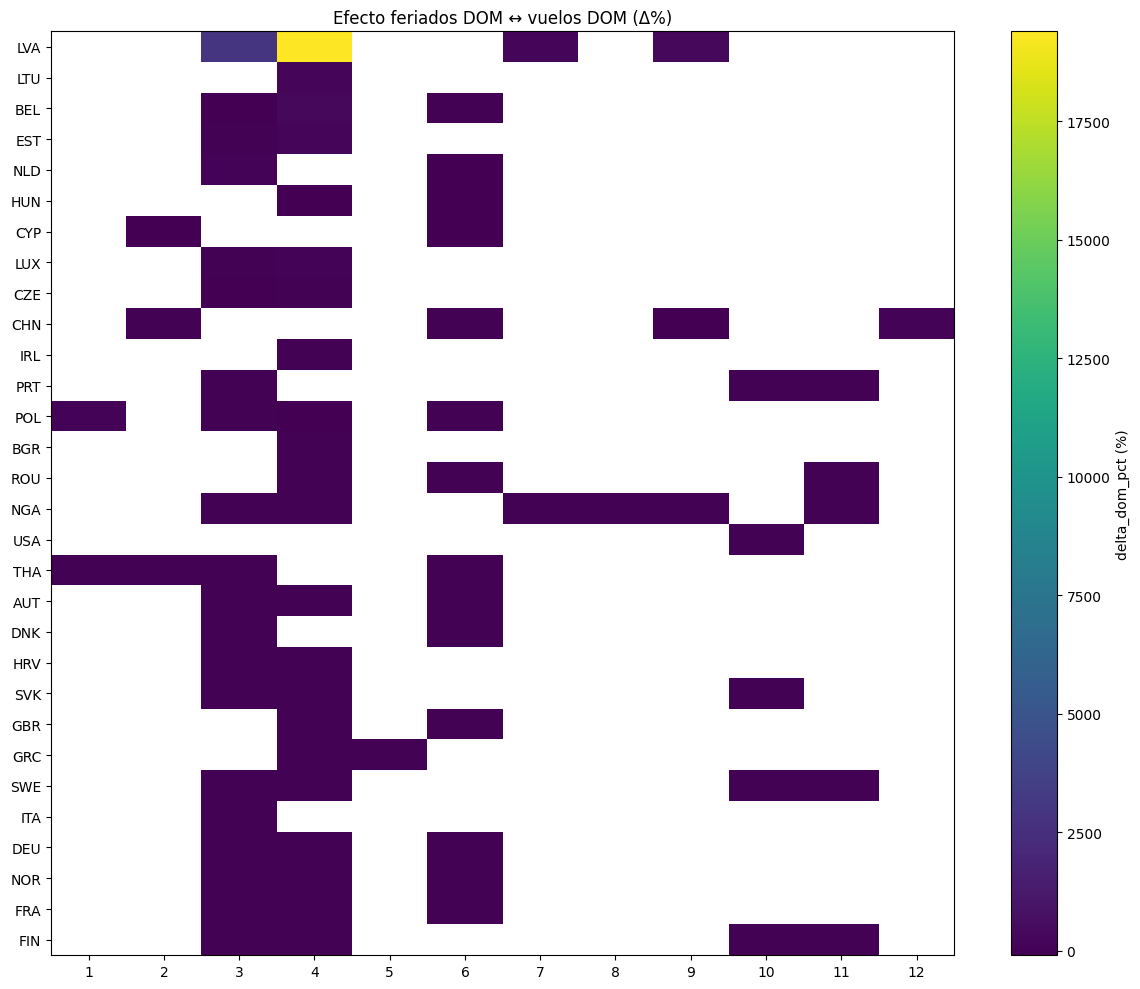

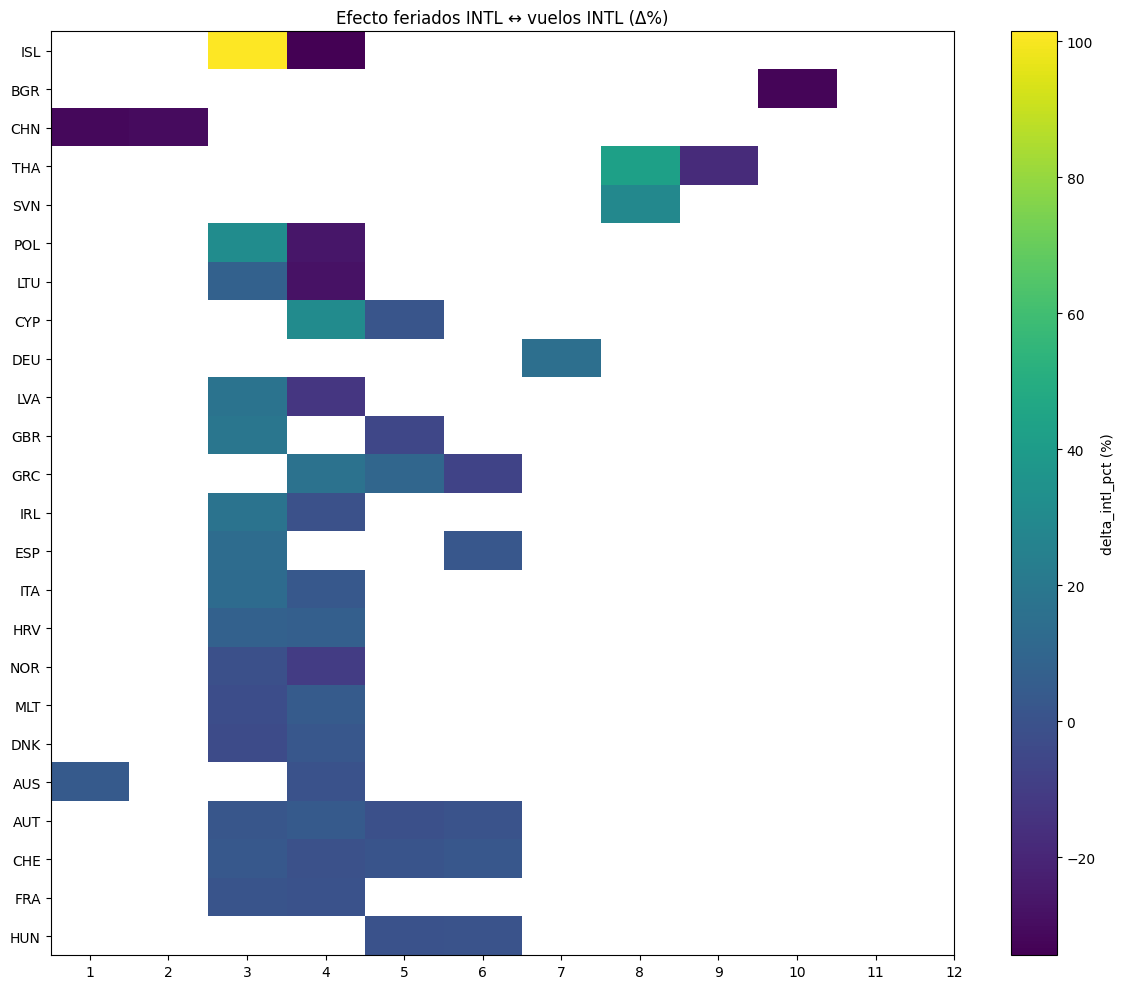

Mapa guardado: map_dom_aligned.html
Mapa guardado: map_intl_aligned.html


In [32]:
# =============================
# LIBRERÍAS
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# (opcional para mapa interactivo)
import plotly.express as px

# =============================
# RUTAS / CARGA
# =============================
DATA_DIR = Path(".")

# =============================
# PREPROCESO FERIADOS
# =============================
holidays["Year"]  = holidays["Date"].dt.year
holidays["Month"] = holidays["Date"].dt.month

# deduplicar (mismo país-fecha-nombre) para no contar subregiones varias veces
holidays = holidays.drop_duplicates(subset=["ISO3","Date","Name"]).copy()

# mapear Type -> alcance (basado en el propio dataset)
scope_map = {
    "Public holiday": "domestic",
    "Local holiday": "domestic",
    "Special holiday": "domestic",
    "Observance": "international",
    "Local observance": "international",
    "Half-day holiday": "other",
    "Working day (replacement)": "other",
}
holidays["holiday_scope"] = holidays["Type"].map(scope_map).fillna("other")

# agregación mensual por país
holidays_monthly = (
    holidays.groupby(["ISO3","Year","Month"], as_index=False)
            .agg(
                holidays_any=("Name","nunique"),
                domestic_holidays=("holiday_scope", lambda x: (x=="domestic").sum()),
                international_holidays=("holiday_scope", lambda x: (x=="international").sum()),
                other_holidays=("holiday_scope", lambda x: (x=="other").sum()),
            )
)

# =============================
# PREPROCESO PASAJEROS
# =============================
passengers["Year"]  = passengers["Year"].astype(int)
passengers["Month"] = passengers["Month"].astype(int)

# =============================
# MERGE MAESTRO
# =============================
df = passengers.merge(holidays_monthly, on=["ISO3","Year","Month"], how="left")
for col in ["holidays_any","domestic_holidays","international_holidays","other_holidays"]:
    df[col] = df[col].fillna(0).astype(int)

# flags: ¿hubo feriado de ese tipo en el mes?
df["has_dom_holiday"]  = (df["domestic_holidays"] > 0).astype(int)
df["has_intl_holiday"] = (df["international_holidays"] > 0).astype(int)

# =============================
# COMPARACIÓN ALINEADA (DOM ↔ DOM / INTL ↔ INTL)
# Delta% por país-mes
# =============================
# doméstico
comp_dom = (
    df.groupby(["ISO3","Month","has_dom_holiday"])
      .agg(avg_dom=("Domestic","mean"), n=("Year","count"))
      .reset_index()
)
p_dom = comp_dom.pivot_table(index=["ISO3","Month"], columns="has_dom_holiday", values="avg_dom").reset_index()
p_dom.columns = ["ISO3","Month","avg_dom_nohol","avg_dom_hol"]
p_dom["avg_dom_nohol"] = p_dom["avg_dom_nohol"].replace(0,np.nan)
p_dom["delta_dom_pct"] = (p_dom["avg_dom_hol"]-p_dom["avg_dom_nohol"])/p_dom["avg_dom_nohol"]*100

# internacional
comp_intl = (
    df.groupby(["ISO3","Month","has_intl_holiday"])
      .agg(avg_intl=("International","mean"), n=("Year","count"))
      .reset_index()
)
p_intl = comp_intl.pivot_table(index=["ISO3","Month"], columns="has_intl_holiday", values="avg_intl").reset_index()
p_intl.columns = ["ISO3","Month","avg_intl_nohol","avg_intl_hol"]
p_intl["avg_intl_nohol"] = p_intl["avg_intl_nohol"].replace(0,np.nan)
p_intl["delta_intl_pct"] = (p_intl["avg_intl_hol"]-p_intl["avg_intl_nohol"])/p_intl["avg_intl_nohol"]*100

# =============================
# HEATMAPS (estáticos) — top países por |efecto|
# =============================
def heatmap_from_delta(tbl, value_col, title, outfile):
    mat = tbl.pivot_table(index="ISO3", columns="Month", values=value_col)
    rank = mat.abs().mean(axis=1).sort_values(ascending=False).head(30).index
    mat_top = mat.loc[rank]

    plt.figure(figsize=(12,10))
    plt.imshow(mat_top.values, aspect="auto", interpolation="nearest")
    plt.colorbar(label=f"{value_col} (%)")
    plt.yticks(np.arange(len(mat_top.index)), mat_top.index)
    plt.xticks(np.arange(12), [str(m) for m in range(1,13)])
    plt.title(title)
    plt.tight_layout()
    plt.savefig(outfile, dpi=150)
    plt.show()

import numpy as np
heatmap_from_delta(p_dom,  "delta_dom_pct",  "Efecto feriados DOM ↔ vuelos DOM (Δ%)",  "heatmap_dom_aligned.png")
heatmap_from_delta(p_intl, "delta_intl_pct", "Efecto feriados INTL ↔ vuelos INTL (Δ%)", "heatmap_intl_aligned.png")

# =============================
# MAPAS (promedio por país) — interactivo con Plotly
# =============================
dom_country = p_dom.groupby("ISO3", as_index=False)["delta_dom_pct"].mean().rename(columns={"delta_dom_pct":"avg_delta_dom"})
intl_country = p_intl.groupby("ISO3", as_index=False)["delta_intl_pct"].mean().rename(columns={"delta_intl_pct":"avg_delta_intl"})

for dat, val_col, title, htmlfile in [
    (dom_country,  "avg_delta_dom",  "Impacto feriados DOM en vuelos DOM (Δ% promedio)",  "map_dom_aligned.html"),
    (intl_country, "avg_delta_intl", "Impacto feriados INTL en vuelos INTL (Δ% promedio)", "map_intl_aligned.html"),
]:
    df_map = dat.merge(countries[["alpha_3","name"]], left_on="ISO3", right_on="alpha_3", how="left")
    fig = px.choropleth(
        df_map, locations="ISO3", color=val_col, hover_name="name",
        color_continuous_scale="RdBu", projection="natural earth",
        title=title
    )
    fig.write_html(htmlfile, include_plotlyjs="cdn", full_html=True)
    print("Mapa guardado:", htmlfile)

# también puedes exportar las tablas si quieres:
p_dom.to_csv("delta_dom_aligned_by_country_month.csv", index=False)
p_intl.to_csv("delta_intl_aligned_by_country_month.csv", index=False)


Mejor formato

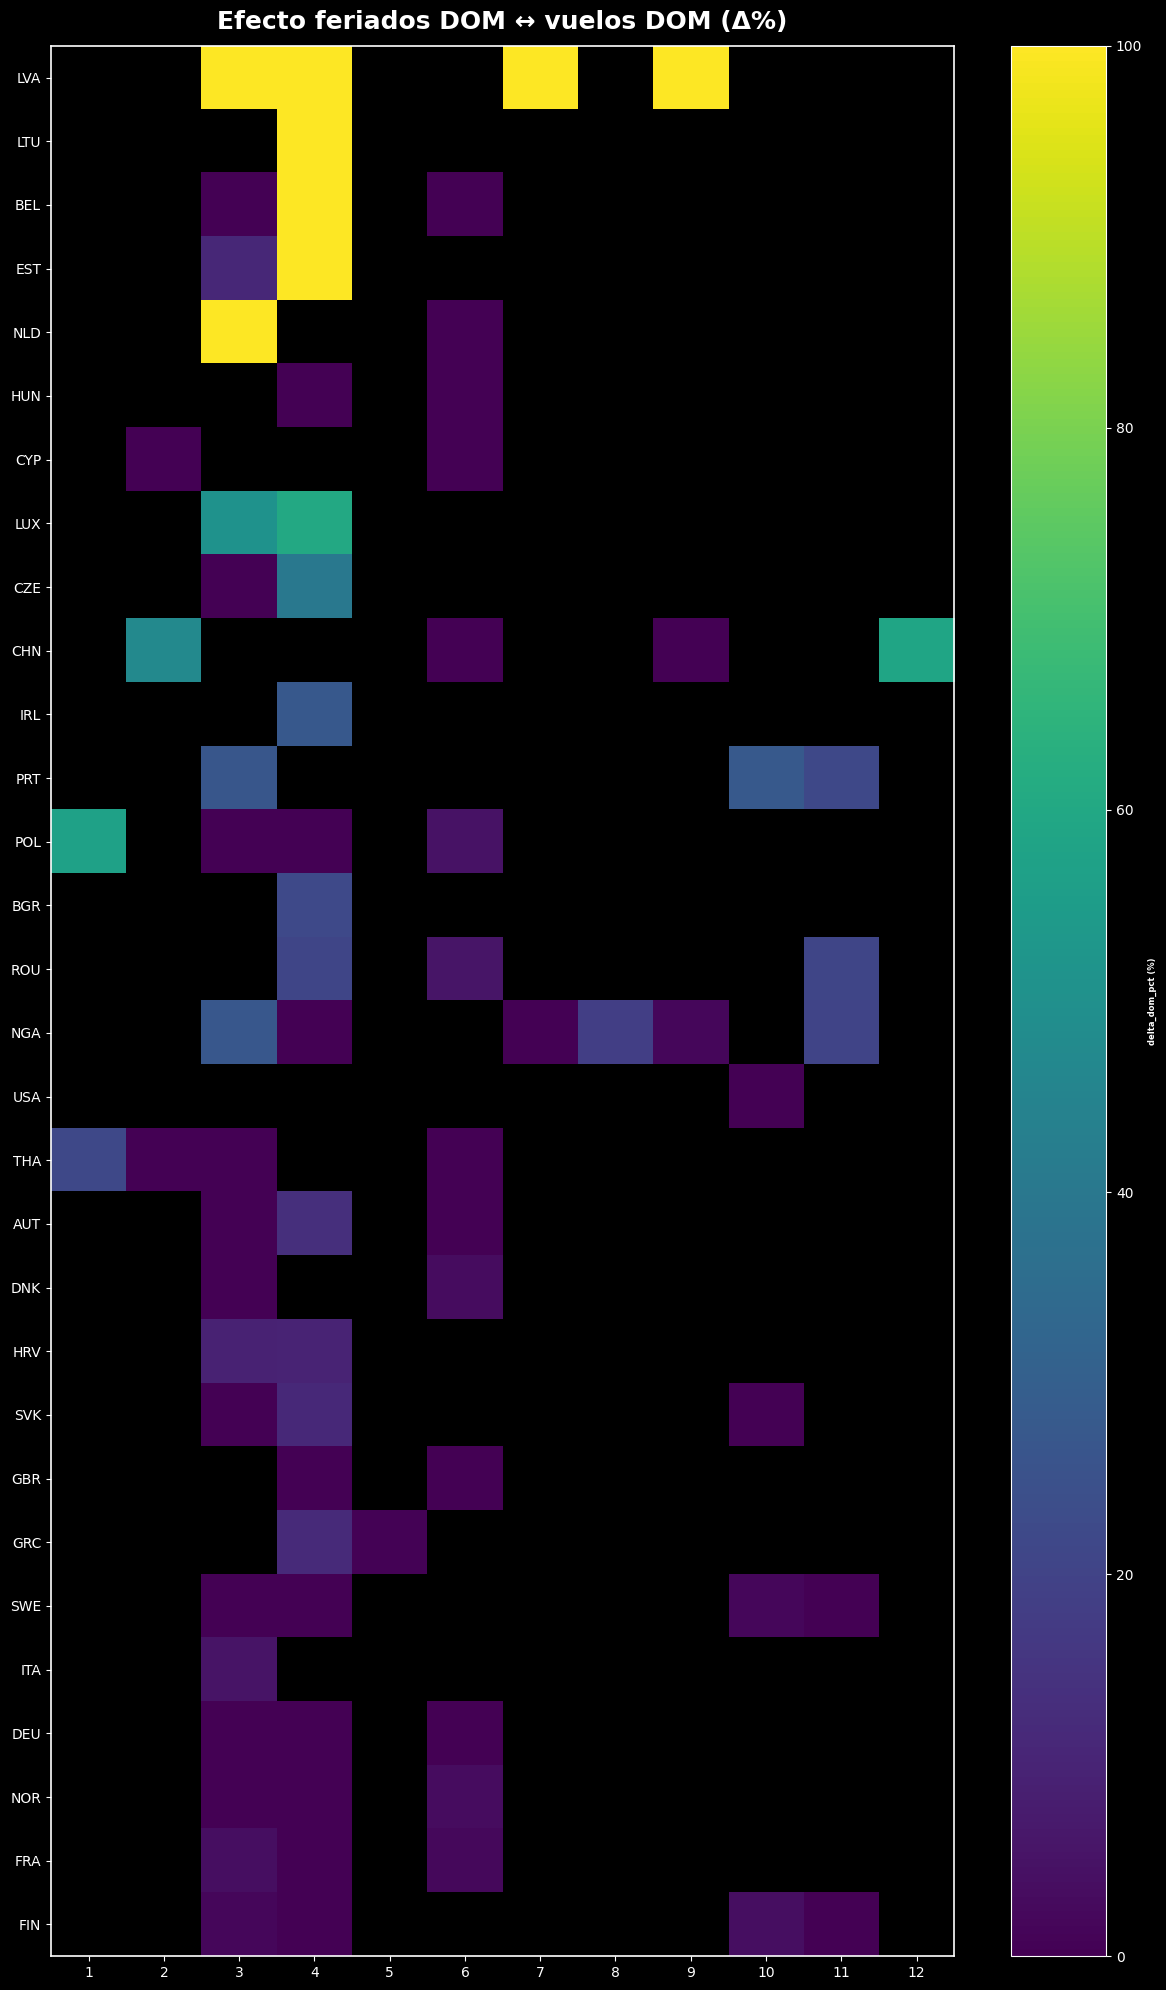

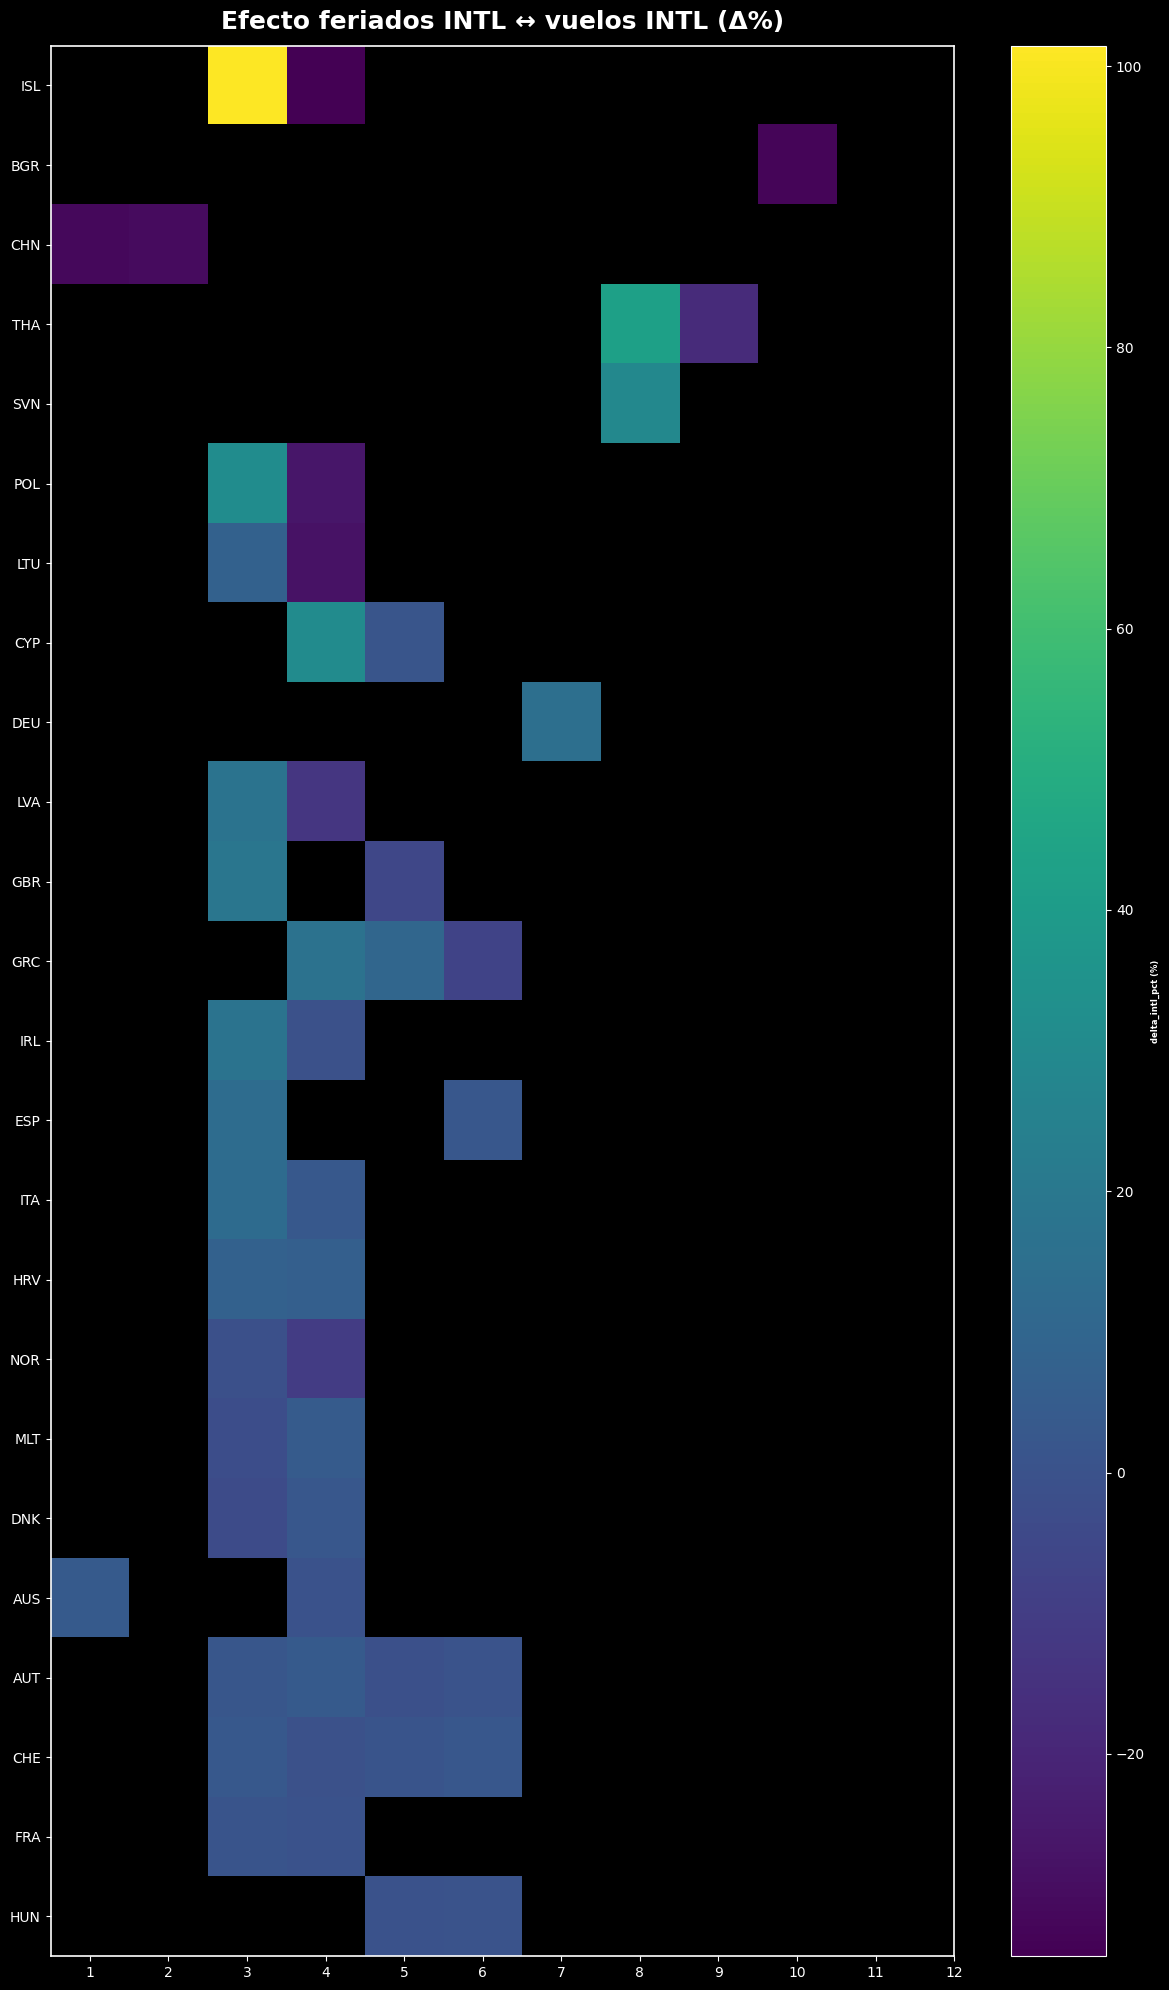

In [ ]:
# =============================
# HEATMAPS (estáticos) — tema oscuro + clipping opcional
# =============================
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

plt.style.use("dark_background")  # tema oscuro global

def heatmap_from_delta(tbl, value_col, title, outfile,
                       clip_max=None, vmin=None, vmax=None):
    # pivot país x mes
    mat = tbl.pivot_table(index="ISO3", columns="Month", values=value_col)
    # rank: top 30 por |efecto|
    rank = mat.abs().mean(axis=1).sort_values(ascending=False).head(30).index
    mat_top = mat.loc[rank]

    # clipping opcional (para quitar outliers absurdos)
    if clip_max is not None:
        mat_top = mat_top.clip(upper=clip_max)

    # límites de color
    if vmin is None or vmax is None:
        vmin = np.nanmin(mat_top.values)
        vmax = np.nanmax(mat_top.values)

    fig, ax = plt.subplots(figsize=(12,20))
    ax.set_facecolor("black")

    im = ax.imshow(mat_top.values, aspect="auto", interpolation="nearest",
                   cmap="viridis", norm=Normalize(vmin=vmin, vmax=vmax))

    # ejes y estilo
    ax.set_title(title, fontsize=18, color="white", fontweight="bold", pad=12)
    ax.set_yticks(np.arange(len(mat_top.index)))
    ax.set_yticklabels(mat_top.index, color="white")
    ax.set_xticks(np.arange(12))
    ax.set_xticklabels([str(m) for m in range(1,13)], color="white")
    for spine in ax.spines.values():
        spine.set_color("white"); spine.set_linewidth(1.2)

    # colorbar en blanco
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(f"{value_col} (%)", color="white", fontsize=12, fontweight="bold")
    cbar.ax.yaxis.set_tick_params(color="white")
    plt.setp(cbar.ax.get_yticklabels(), color="white")

    plt.tight_layout()
    plt.savefig(outfile, dpi=160, facecolor="black")
    plt.show()

# === Llamadas ===
# DOMÉSTICO: cap a 100% y escala fija 0–100 para evitar outliers
heatmap_from_delta(
    p_dom, "delta_dom_pct",
    "Efecto feriados DOM ↔ vuelos DOM (Δ%)",
    "heatmap_dom_aligned.png",
    clip_max=100, vmin=0, vmax=100
)

# INTERNACIONAL: sin cap (o ajusta si lo ves necesario)
heatmap_from_delta(
    p_intl, "delta_intl_pct",
    "Efecto feriados INTL ↔ vuelos INTL (Δ%)",
    "heatmap_intl_aligned.png"
)


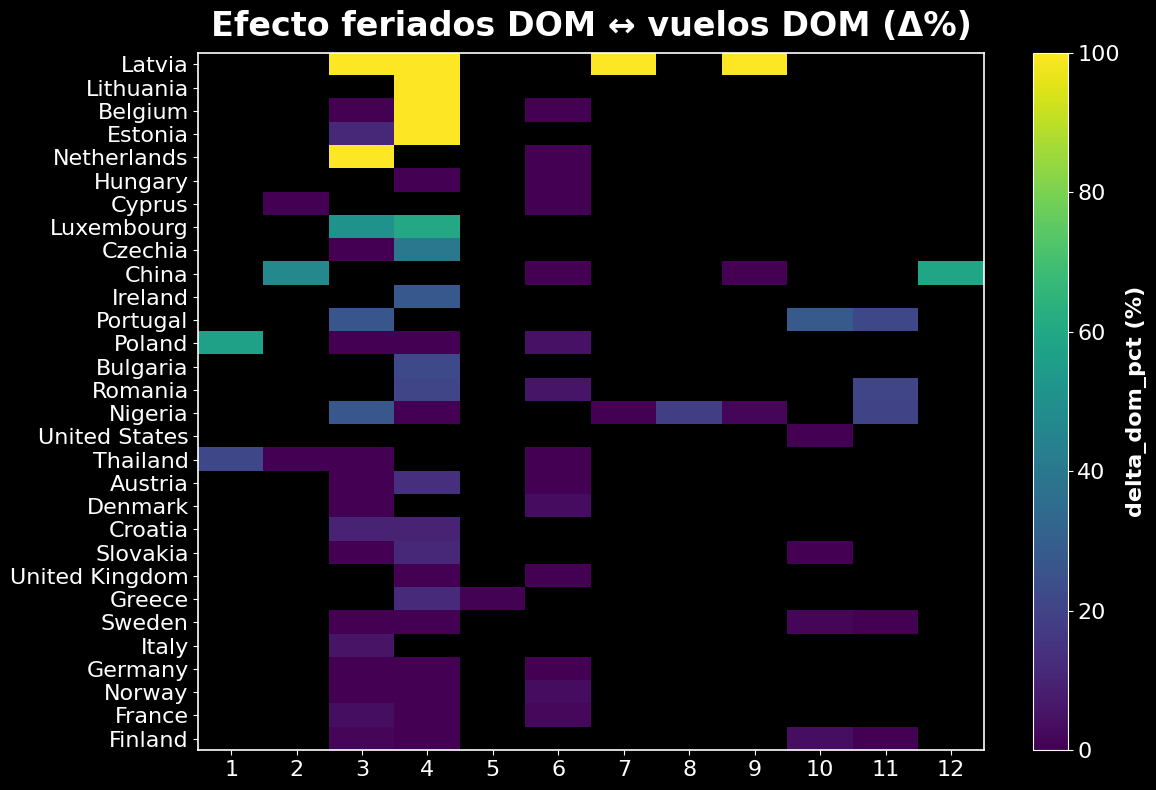

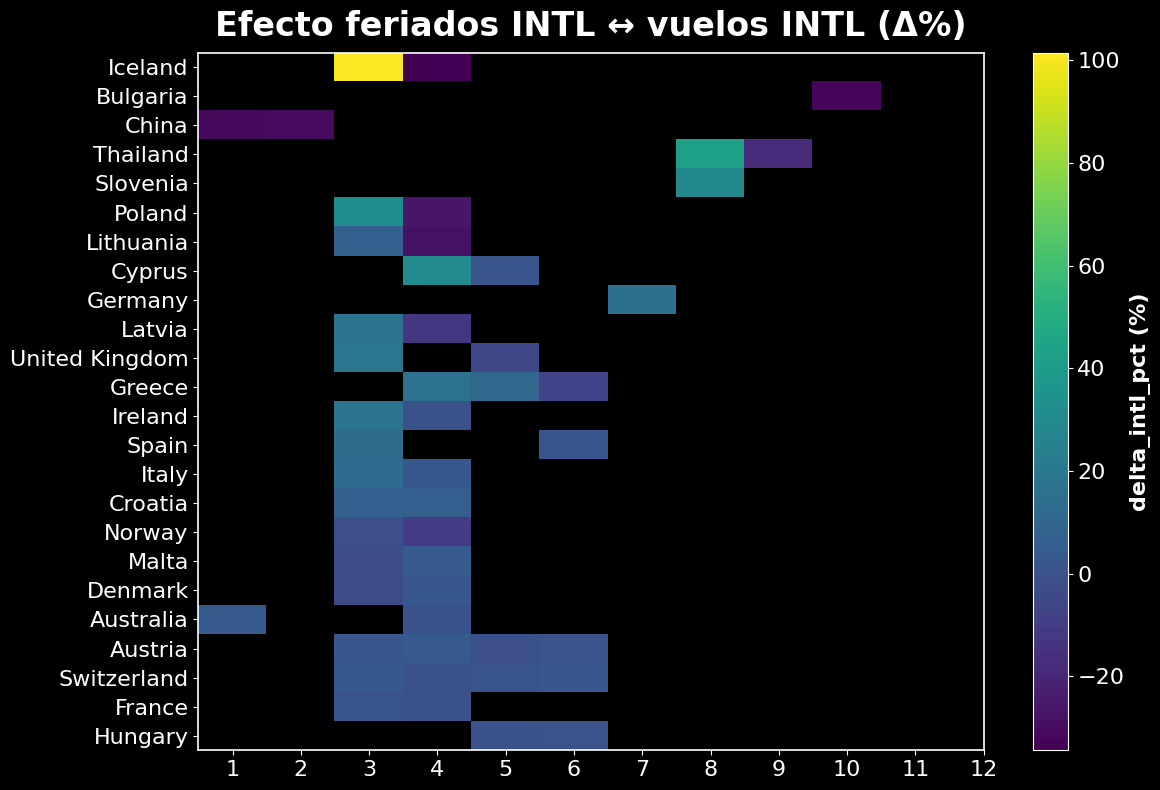

In [54]:
# =============================
# HEATMAPS (estáticos) — tema oscuro + clipping opcional
# =============================
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

plt.style.use("dark_background")  # tema oscuro global

def heatmap_from_delta(tbl, value_col, title, outfile,
                       countries_df, clip_max=None, vmin=None, vmax=None):
    # Agregar nombre real del país
    tbl = tbl.merge(countries_df[["alpha_3","name"]], left_on="ISO3", right_on="alpha_3", how="left")
    tbl["Country"] = tbl["name"].fillna(tbl["ISO3"])

    # pivot país x mes
    mat = tbl.pivot_table(index="Country", columns="Month", values=value_col)
    # rank: top 30 por |efecto|
    rank = mat.abs().mean(axis=1).sort_values(ascending=False).head(30).index
    mat_top = mat.loc[rank]

    # clipping opcional (para quitar outliers absurdos)
    if clip_max is not None:
        mat_top = mat_top.clip(upper=clip_max)

    # límites de color
    if vmin is None or vmax is None:
        vmin = np.nanmin(mat_top.values)
        vmax = np.nanmax(mat_top.values)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.set_facecolor("black")

    im = ax.imshow(mat_top.values, aspect="auto", interpolation="nearest",
                   cmap="viridis", norm=Normalize(vmin=vmin, vmax=vmax))

    # ejes y estilo con tamaño aumentado 35%
    ax.set_title(title, fontsize=int(18*1.35), color="white", fontweight="bold", pad=12)
    ax.set_yticks(np.arange(len(mat_top.index)))
    ax.set_yticklabels(mat_top.index, color="white", fontsize=int(12*1.35))
    ax.set_xticks(np.arange(12))
    ax.set_xticklabels([str(m) for m in range(1,13)], color="white", fontsize=int(12*1.35))
    for spine in ax.spines.values():
        spine.set_color("white"); spine.set_linewidth(1.2)

    # colorbar en blanco con fuente más grande
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(f"{value_col} (%)", color="white", fontsize=int(12*1.35), fontweight="bold")
    cbar.ax.yaxis.set_tick_params(color="white", labelsize=int(12*1.35))
    plt.setp(cbar.ax.get_yticklabels(), color="white")

    plt.tight_layout()
    plt.savefig(outfile, dpi=160, facecolor="black")
    plt.show()

# === Llamadas ===
heatmap_from_delta(
    p_dom, "delta_dom_pct",
    "Efecto feriados DOM ↔ vuelos DOM (Δ%)",
    "heatmap_dom_aligned.png",
    countries_df=countries,
    clip_max=100, vmin=0, vmax=100
)

heatmap_from_delta(
    p_intl, "delta_intl_pct",
    "Efecto feriados INTL ↔ vuelos INTL (Δ%)",
    "heatmap_intl_aligned.png",
    countries_df=countries
)


In [19]:
import pandas as pd
import numpy as np
from pathlib import Path

DATA_DIR = Path(".")
#holidays   = pd.read_csv(DATA_DIR/"global_holidays.csv", parse_dates=["Date"])
#passengers = pd.read_csv(DATA_DIR/"monthly_passengers.csv")
#countries  = pd.read_csv(DATA_DIR/"countries.csv")

# Holidays: Year/Month + dedup + scope
holidays["Year"]  = holidays["Date"].dt.year
holidays["Month"] = holidays["Date"].dt.month
holidays = holidays.drop_duplicates(subset=["ISO3","Date","Name"]).copy()

# Agregado mensual (cuenta cualquier feriado)
holidays_monthly = (
    holidays.groupby(["ISO3","Year","Month"], as_index=False)
            .agg(holidays_any=("Name","nunique"))
)

# Pasajeros: aseguramos tipos numéricos
for c in ["Year","Month"]:
    passengers[c] = pd.to_numeric(passengers[c], errors="coerce").astype("Int64")

for c in ["Total","Domestic","International","Total_OS"]:
    if c in passengers.columns:
        passengers[c] = pd.to_numeric(passengers[c], errors="coerce")

# Merge
df = passengers.merge(holidays_monthly, on=["ISO3","Year","Month"], how="left")
df["holidays_any"] = df["holidays_any"].fillna(0).astype(int)


In [20]:
ISO = "MEX"
MONTH = 4  # abril

sub = df.query("ISO3 == @ISO and Month == @MONTH").copy()
print("Registros MEX-abril:", len(sub))
print("Años disponibles:", sorted(sub["Year"].dropna().unique().tolist()))

# ¿Hay NaN en métricas?
print("NaN Tot/Dom/Int:", 
      sub["Total"].isna().sum(), 
      sub["Domestic"].isna().sum(), 
      sub["International"].isna().sum())

# Muestra rápida
print(sub[["Year","Total","Domestic","International","holidays_any"]].sort_values("Year"))


Registros MEX-abril: 8
Años disponibles: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
NaN Tot/Dom/Int: 8 8 8
      Year  Total  Domestic  International  holidays_any
4557  2010    NaN       NaN            NaN             4
4569  2011    NaN       NaN            NaN             4
4581  2012    NaN       NaN            NaN             4
4593  2013    NaN       NaN            NaN             1
4605  2014    NaN       NaN            NaN             4
4617  2015    NaN       NaN            NaN             4
4629  2016    NaN       NaN            NaN             1
4641  2017    NaN       NaN            NaN             4


### Patrones historicos


In [59]:
# --- 1) Coalesce de métricas y normalización si faltan ---
import pandas as pd
import numpy as np

def build_use_cols(d):
    d = d.copy()
    d["Total_use"] = pd.to_numeric(d.get("Total"), errors="coerce")
    if "Total_OS" in d.columns:
        m = d["Total_use"].isna() & d["Total_OS"].notna()
        d.loc[m, "Total_use"] = pd.to_numeric(d.loc[m, "Total_OS"], errors="coerce")
    m = d["Total_use"].isna() & d["Domestic"].notna() & d["International"].notna()
    d.loc[m, "Total_use"] = pd.to_numeric(d["Domestic"], errors="coerce") + pd.to_numeric(d["International"], errors="coerce")
    d["Domestic_use"]      = pd.to_numeric(d.get("Domestic"), errors="coerce")
    d["International_use"] = pd.to_numeric(d.get("International"), errors="coerce")
    return d

def add_country_year_delta(d, col):
    base = d.groupby(["ISO3","Year"], as_index=False)[col].mean().rename(columns={col: "_year_mean"})
    z = d.merge(base, on=["ISO3","Year"], how="left")
    z[col + "_delta_pct"] = (z[col] - z["_year_mean"]) / z["_year_mean"] * 100
    return z.drop(columns=["_year_mean"])

# Construir columnas si faltan
if "Total_use" not in df.columns:
    df = build_use_cols(df)

for col in ["Total_use", "Domestic_use", "International_use"]:
    if f"{col}_delta_pct" not in df.columns:
        df = add_country_year_delta(df, col)


In [60]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("dark_background")

def year_matrix(df, year, value_col="Total_use_delta_pct", countries_df=None):
    sub = df[df["Year"] == year].copy()
    if countries_df is not None and "alpha_3" in countries_df.columns:
        sub = sub.merge(countries_df[["alpha_3","name"]], left_on="ISO3", right_on="alpha_3", how="left")
        sub["Country"] = sub["name"].fillna(sub["ISO3"])
        idx = "Country"
    else:
        idx = "ISO3"
    mat = sub.pivot_table(index=idx, columns="Month", values=value_col)
    # ordenar filas por media absoluta (países más “activos” arriba)
    order = mat.abs().mean(axis=1).sort_values(ascending=False).index
    return mat.loc[order]

def compare_years_heatmaps(df, years, value_col="Total_use_delta_pct",
                           vmin=-100, vmax=100, countries_df=None):
    n = len(years)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 12), sharey=True)
    if n == 1:
        axes = [axes]

    im = None
    for i, year in enumerate(years):
        mat = year_matrix(df, year, value_col=value_col, countries_df=countries)
        if mat.empty:
            axes[i].text(0.5, 0.5, f"Sin datos para {year}", ha="center", va="center", color="white")
            axes[i].axis("off"); continue
        im = axes[i].imshow(mat.values, aspect="auto", cmap="viridis", vmin=vmin, vmax=vmax)
        axes[i].set_title(f"Año {year}", fontsize=18, color="white", fontweight="bold")
        axes[i].set_xticks(np.arange(12))
        axes[i].set_xticklabels([str(m) for m in range(1,13)], color="white", fontsize=12)
        axes[i].set_yticks(np.arange(len(mat.index)))
        axes[i].set_yticklabels(mat.index, color="white", fontsize=10)
        for spine in axes[i].spines.values():
            spine.set_color("white")

    if im is not None:
        cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.04)
        cbar.set_label(f"{value_col} (%)", color="white", fontsize=12, fontweight="bold")
        cbar.ax.tick_params(colors="white")
    plt.tight_layout()
    plt.show()


C:\Users\Eydan\AppData\Local\Temp\ipykernel_20908\102585720.py:44: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



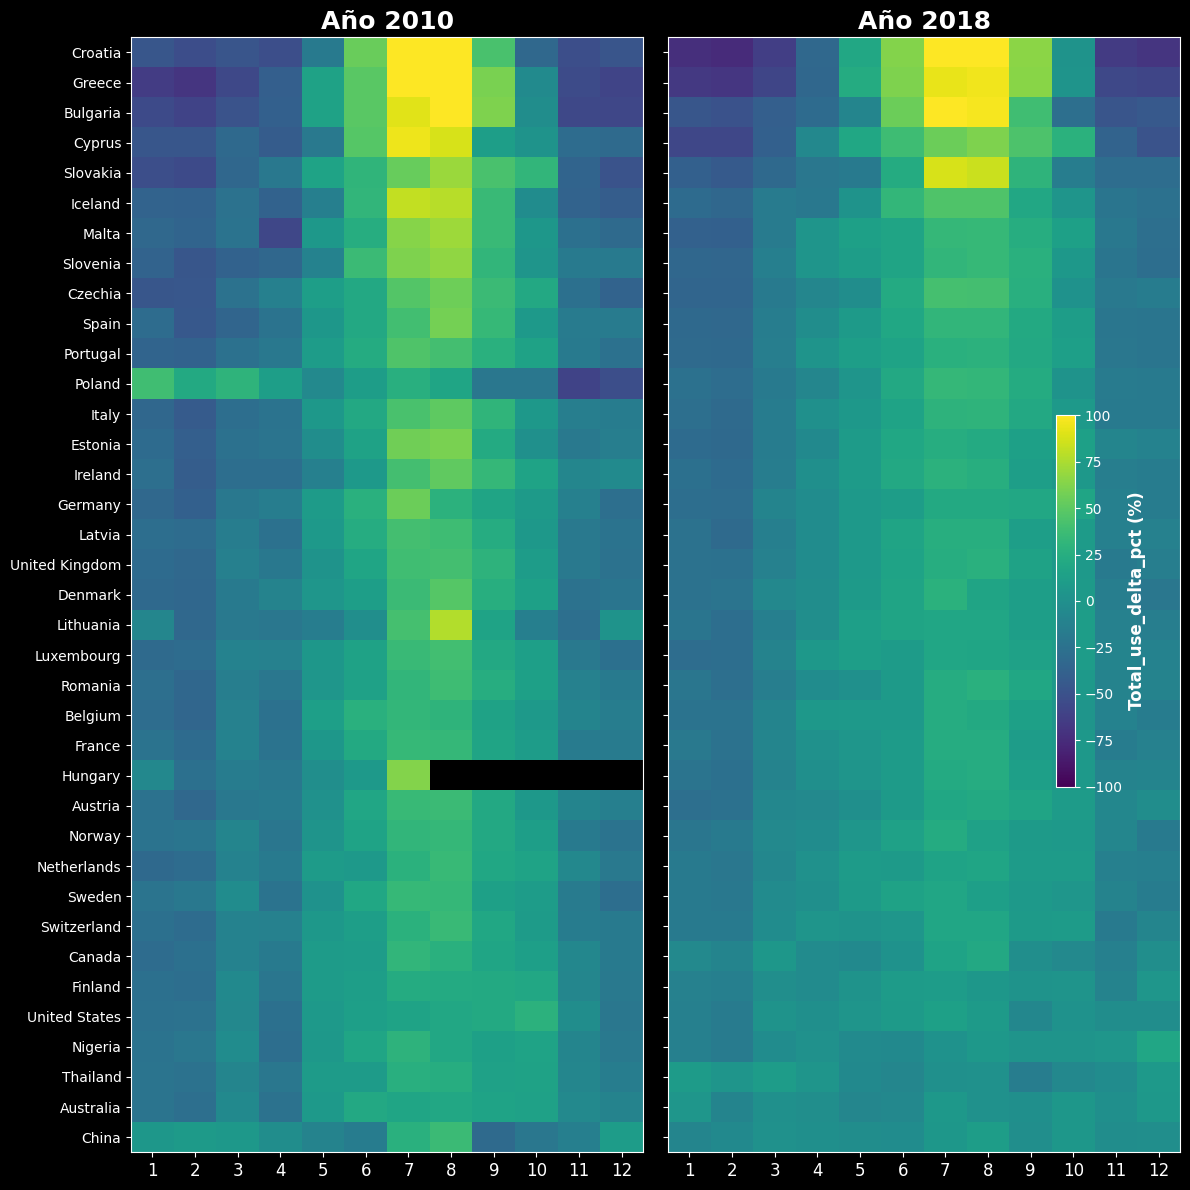

C:\Users\Eydan\AppData\Local\Temp\ipykernel_20908\102585720.py:44: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



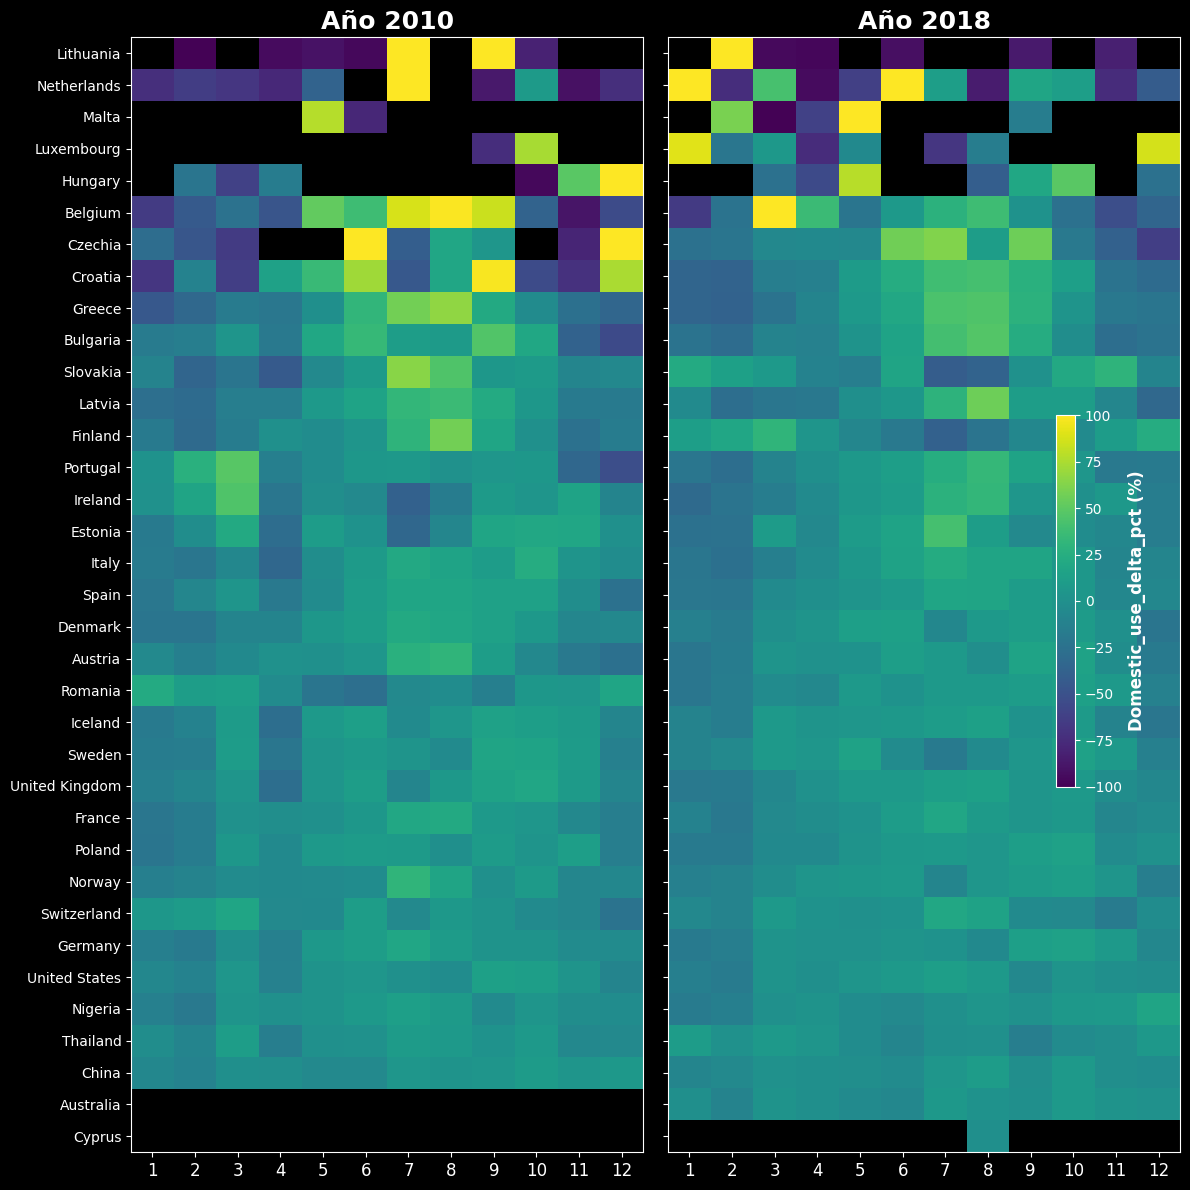

C:\Users\Eydan\AppData\Local\Temp\ipykernel_20908\102585720.py:44: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



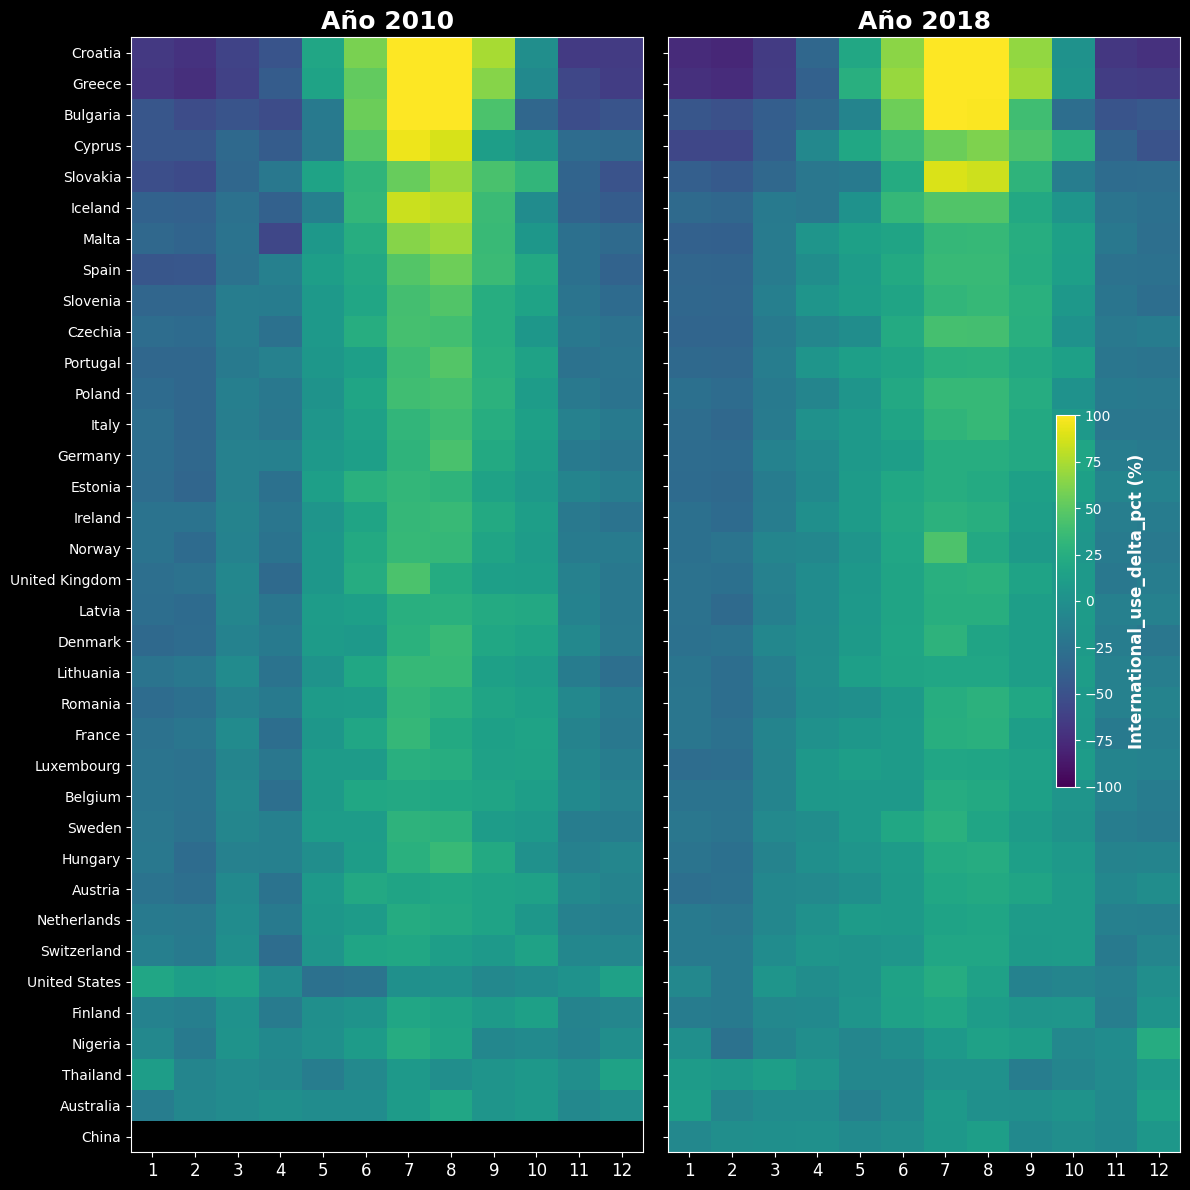

In [61]:
# Total (normalizado) 2010 vs 2018
compare_years_heatmaps(df, years=[2010, 2018], value_col="Total_use_delta_pct", vmin=-100, vmax=100, countries_df=countries)

# También puedes comparar doméstico o internacional normalizados:
compare_years_heatmaps(df, years=[2010, 2018], value_col="Domestic_use_delta_pct", vmin=-100, vmax=100, countries_df=countries)
compare_years_heatmaps(df, years=[2010, 2018], value_col="International_use_delta_pct", vmin=-100, vmax=100, countries_df=countries)
